# Picarro incubation, data analyzed 9/20/17
## Script written by Silene DeCiucies
### Edited by Thea Whitman


In [1]:
library(data.table)
library(ggplot2)
library(cowplot)
library(dplyr)


Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
#############################################################################################################
#  Define constants
#############################################################################################################

jar.headspace.volume <- 0.867
co2.density_30C <- 0.001778
co2.carbon.frac <- 12.01 / 44.0095


In [3]:
# Just checking how they calculated their d13C ratios...
PDBratio = 0.0112372
C12 = 4.108773
C13 = 0.1432768
d13Creported = 2103.170
C1213ratio = C13/C12
C1213ratio
d13Ccalculated = (C1213ratio/PDBratio -1 )*1000
d13Ccalculated
# Confirms the C12 is only 12, for Ctot we need to add 13C.

[1] 0.03487095

[1] 2103.17

In [4]:
#############################################################################################################
#  Load Data Files 
#############################################################################################################
load("../data/Picarro_Data/samplesonly9_1.Rda")
pic.data <- data.table(samplesonly9_1) # Picarro data
frac6  <- fread("../data/Picarro_Data/frac_Thea.txt") # List of fractions (of sampling volume?) for each Mason jar
carbon  <- fread("../data/Picarro_Data/carbon_table_thea.txt") # List of total C in samples
mass5  <- fread("../data/Picarro_Data/thea_mass.txt") # List of total soil mass in each Quorpak
#For the first set of data Silene used carbon_table_thea and thea_mass (this was before the destructive sampling)

In [5]:
SampleData = data.table(read.csv("../data/Picarro_Data/NEON_for_Picarro.csv"))
SampleData = SampleData %>%
    filter(Day==10)
SampleData = data.table(SampleData)

In [6]:
#############################################################################################################
#  Data Preprocessing  
#############################################################################################################
drop.cols <- c("EPOCH_TIME", "DATE", "TIME", "FRAC_HRS_SINCE_JAN1", 
               "ALARM_STATUS", "INST_STATUS", "CavityTemp", "CavityPressure", "OutletValve", 
               "HP_12CH4_dry", "HP_Delta_iCH4_Raw", "HR_12CH4_dry", "HR_Delta_iCH4_Raw", "H2O",
               "command",  "sample", "sample.timepoint",  "rep",  "purge")  #List of unwanted columns

pic.data[, drop.cols := NULL, with=F]   # drop columns we don't need from Picarro data
#blanks <- c(1,2,63,64)  #identify blanks in the run (sample.test IDs)
#pic.data <- pic.data[!(sample.test %in% blanks)]  # drop rows for empty sample jars (blanks)
pic.data[, sample.rep := as.integer(sample.rep)] # establishes sample.rep as integer

pic.data[step=="purge", sample.rep := sample.rep + 1L]
    # Find only the steps where it was purging.
    # Then, match purge data with analysis data that follows (rather than precedes) it

pic.data[, samprep := factor(paste(formatC(sample.test, digits = 4, flag="0"), formatC(sample.rep, digits = 4, flag="0"), sep=","))]
    # Designates the samprep column that says which analysis steps are related
    # Also adds 0's to make them all the same number of digits.

pic.data[, samprepstep := factor(paste(samprep, formatC(step), sep=","))]
    # Adding a column with the jar, timepoint, and step factor.

pic.data[, CO2tot := X12CO2_dry + X13CO2, keyby=samprep]
  # Need to add the 12CO2 and the 13CO2 to get total CO2.

pic.data[, maxco2 := max(CO2tot, na.rm = T), keyby=samprep]
  # Use maximum CO2 concentration measured as representative of CO2 in the headspace
  # May want to sum 13CO2 and 12CO2 since label so high
  # Note warning may say there are no NAs.



Warning message in `[.data.table`(pic.data, , `:=`(drop.cols, NULL), with = F):
“with=FALSE together with := was deprecated in v1.9.4 released Oct 2014. Please wrap the LHS of := with parentheses; e.g., DT[,(myVar):=sum(b),by=a] to assign to column name(s) held in variable myVar. See ?':=' for other examples. As warned in 2014, this is now a warning.”

FRAC_DAYS_SINCE_JAN1 X12CO2_dry X13CO2     Delta_Raw_iCO2 sample.test
1            NA                    NA          NA       NA       1          
2      239.4194             0.5982588  0.02996025 3456.545       1          
3      239.4194             0.5982588  0.02996025 3456.545       1          
4      239.4194             0.6419139  0.03214646 3456.545       1          
5      239.4194             0.6419139  0.02592880 2594.575       1          
6      239.4194             0.6419139  0.02592880 2594.575       1          
7      239.4194             0.6419139  0.02592880 2594.575       1          
8      239.4194             0.6717679  0.02713470 2594.575       1          
9      239.4194             0.6717679  0.02572990 2408.480       1          
10     239.4194             0.6717679  0.02572990 2408.480       1          
11     239.4195             0.6717679  0.02572990 2408.480       1          
12     239.4195             0.5680671  0.02175797 2408.480       1          
13     239.4195             0.5680671  0.04546934 6122.966       1          
14     239.4195             0.5680671  0.04546934 6122.966       1          
15     239.4195             0.5680671  0.04546934 6122.966       1          
16     239.4195             0.6452569  0.05164778 6122.966       1          
17     239.4195             0.6452569  0.03086350 3256.517       1          
18     239.4195             0.6452569  0.03086350 3256.517       1          
19     239.4195             0.6452569  0.03086350 3256.517       1          
20     239.4195             0.6212187  0.02971372 3256.517       1          
21     239.4195             0.6212187  0.01534829 1198.656       1          
22     239.4196             0.6212187  0.01534829 1198.656       1          
23     239.4196             0.6212187  0.01534829 1198.656       1          
24     239.4196             0.6952681  0.01717781 1198.656       1          
25     239.4196             0.6952681  0.02189861 1802.890       1          
26     239.4196             0.6952681  0.02189861 1802.890       1          
27     239.4196             0.6952681  0.02189861 1802.890       1          
28     239.4196             0.5881723  0.01852545 1802.890       1          
29     239.4196             0.5881723  0.01510310 1285.090       1          
30     239.4196             0.5881723  0.01510310 1285.090       1          
⋮      ⋮                    ⋮          ⋮          ⋮              ⋮          
427977 249.7173             540.2978   5.998294   -12.04677      63         
427978 249.7173             540.2978   5.995155   -12.56364      63         
427979 249.7173             540.2978   5.995155   -12.56364      63         
427980 249.7173             540.2978   5.995155   -12.56364      63         
427981 249.7173             540.1669   5.993702   -12.56364      63         
427982 249.7173             540.1669   5.998897   -11.70787      63         
427983 249.7174             540.1669   5.998897   -11.70787      63         
427984 249.7174             540.1669   5.998897   -11.70787      63         
427985 249.7174             540.8871   6.006895   -11.70787      63         
427986 249.7174             540.8871   5.994345   -13.77277      63         
427987 249.7174             540.8871   5.994345   -13.77277      63         
427988 249.7174             540.8871   5.994345   -13.77277      63         
427989 249.7174             541.4753   6.000863   -13.77277      63         
427990 249.7174             541.4753   6.001033   -13.74498      63         
427991 249.7174             541.4753   6.001033   -13.74498      63         
427992 249.7175             541.4753   6.001033   -13.74498      63         
427993 249.7175             541.6163   6.002595   -13.74498      63         
427994 249.7175             541.6163   6.007831   -12.88471      63         
427995 249.7175             541.6163   6.007831   -12.88471      63         
427996 249.7175             541.6163   6.007831   -12.88471      63         
427

FRAC_DAYS_SINCE_JAN1 X12CO2_dry X13CO2     Delta_Raw_iCO2 sample.test
1            NA                    NA          NA       NA       1          
2      239.4194             0.5982588  0.02996025 3456.545       1          
3      239.4194             0.5982588  0.02996025 3456.545       1          
4      239.4194             0.6419139  0.03214646 3456.545       1          
5      239.4194             0.6419139  0.02592880 2594.575       1          
6      239.4194             0.6419139  0.02592880 2594.575       1          
7      239.4194             0.6419139  0.02592880 2594.575       1          
8      239.4194             0.6717679  0.02713470 2594.575       1          
9      239.4194             0.6717679  0.02572990 2408.480       1          
10     239.4194             0.6717679  0.02572990 2408.480       1          
11     239.4195             0.6717679  0.02572990 2408.480       1          
12     239.4195             0.5680671  0.02175797 2408.480       1          
13     239.4195             0.5680671  0.04546934 6122.966       1          
14     239.4195             0.5680671  0.04546934 6122.966       1          
15     239.4195             0.5680671  0.04546934 6122.966       1          
16     239.4195             0.6452569  0.05164778 6122.966       1          
17     239.4195             0.6452569  0.03086350 3256.517       1          
18     239.4195             0.6452569  0.03086350 3256.517       1          
19     239.4195             0.6452569  0.03086350 3256.517       1          
20     239.4195             0.6212187  0.02971372 3256.517       1          
21     239.4195             0.6212187  0.01534829 1198.656       1          
22     239.4196             0.6212187  0.01534829 1198.656       1          
23     239.4196             0.6212187  0.01534829 1198.656       1          
24     239.4196             0.6952681  0.01717781 1198.656       1          
25     239.4196             0.6952681  0.02189861 1802.890       1          
26     239.4196             0.6952681  0.02189861 1802.890       1          
27     239.4196             0.6952681  0.02189861 1802.890       1          
28     239.4196             0.5881723  0.01852545 1802.890       1          
29     239.4196             0.5881723  0.01510310 1285.090       1          
30     239.4196             0.5881723  0.01510310 1285.090       1          
⋮      ⋮                    ⋮          ⋮          ⋮              ⋮          
427977 249.7173             540.2978   5.998294   -12.04677      63         
427978 249.7173             540.2978   5.995155   -12.56364      63         
427979 249.7173             540.2978   5.995155   -12.56364      63         
427980 249.7173             540.2978   5.995155   -12.56364      63         
427981 249.7173             540.1669   5.993702   -12.56364      63         
427982 249.7173             540.1669   5.998897   -11.70787      63         
427983 249.7174             540.1669   5.998897   -11.70787      63         
427984 249.7174             540.1669   5.998897   -11.70787      63         
427985 249.7174             540.8871   6.006895   -11.70787      63         
427986 249.7174             540.8871   5.994345   -13.77277      63         
427987 249.7174             540.8871   5.994345   -13.77277      63         
427988 249.7174             540.8871   5.994345   -13.77277      63         
427989 249.7174             541.4753   6.000863   -13.77277      63         
427990 249.7174             541.4753   6.001033   -13.74498      63         
427991 249.7174             541.4753   6.001033   -13.74498      63         
427992 249.7175             541.4753   6.001033   -13.74498      63         
427993 249.7175             541.6163   6.002595   -13.74498      63         
427994 249.7175             541.6163   6.007831   -12.88471      63         
427995 249.7175             541.6163   6.007831   -12.88471      63         
427996 249.7175             541.6163   6.007831   -12.88471      63         
427

FRAC_DAYS_SINCE_JAN1 X12CO2_dry X13CO2     Delta_Raw_iCO2 sample.test
1            NA                    NA          NA       NA       1          
2      239.4194             0.5982588  0.02996025 3456.545       1          
3      239.4194             0.5982588  0.02996025 3456.545       1          
4      239.4194             0.6419139  0.03214646 3456.545       1          
5      239.4194             0.6419139  0.02592880 2594.575       1          
6      239.4194             0.6419139  0.02592880 2594.575       1          
7      239.4194             0.6419139  0.02592880 2594.575       1          
8      239.4194             0.6717679  0.02713470 2594.575       1          
9      239.4194             0.6717679  0.02572990 2408.480       1          
10     239.4194             0.6717679  0.02572990 2408.480       1          
11     239.4195             0.6717679  0.02572990 2408.480       1          
12     239.4195             0.5680671  0.02175797 2408.480       1          
13     239.4195             0.5680671  0.04546934 6122.966       1          
14     239.4195             0.5680671  0.04546934 6122.966       1          
15     239.4195             0.5680671  0.04546934 6122.966       1          
16     239.4195             0.6452569  0.05164778 6122.966       1          
17     239.4195             0.6452569  0.03086350 3256.517       1          
18     239.4195             0.6452569  0.03086350 3256.517       1          
19     239.4195             0.6452569  0.03086350 3256.517       1          
20     239.4195             0.6212187  0.02971372 3256.517       1          
21     239.4195             0.6212187  0.01534829 1198.656       1          
22     239.4196             0.6212187  0.01534829 1198.656       1          
23     239.4196             0.6212187  0.01534829 1198.656       1          
24     239.4196             0.6952681  0.01717781 1198.656       1          
25     239.4196             0.6952681  0.02189861 1802.890       1          
26     239.4196             0.6952681  0.02189861 1802.890       1          
27     239.4196             0.6952681  0.02189861 1802.890       1          
28     239.4196             0.5881723  0.01852545 1802.890       1          
29     239.4196             0.5881723  0.01510310 1285.090       1          
30     239.4196             0.5881723  0.01510310 1285.090       1          
⋮      ⋮                    ⋮          ⋮          ⋮              ⋮          
427977 249.7173             540.2978   5.998294   -12.04677      63         
427978 249.7173             540.2978   5.995155   -12.56364      63         
427979 249.7173             540.2978   5.995155   -12.56364      63         
427980 249.7173             540.2978   5.995155   -12.56364      63         
427981 249.7173             540.1669   5.993702   -12.56364      63         
427982 249.7173             540.1669   5.998897   -11.70787      63         
427983 249.7174             540.1669   5.998897   -11.70787      63         
427984 249.7174             540.1669   5.998897   -11.70787      63         
427985 249.7174             540.8871   6.006895   -11.70787      63         
427986 249.7174             540.8871   5.994345   -13.77277      63         
427987 249.7174             540.8871   5.994345   -13.77277      63         
427988 249.7174             540.8871   5.994345   -13.77277      63         
427989 249.7174             541.4753   6.000863   -13.77277      63         
427990 249.7174             541.4753   6.001033   -13.74498      63         
427991 249.7174             541.4753   6.001033   -13.74498      63         
427992 249.7175             541.4753   6.001033   -13.74498      63         
427993 249.7175             541.6163   6.002595   -13.74498      63         
427994 249.7175             541.6163   6.007831   -12.88471      63         
427995 249.7175             541.6163   6.007831   -12.88471      63         
427996 249.7175             541.6163   6.007831   -12.88471      63         
427

FRAC_DAYS_SINCE_JAN1 X12CO2_dry X13CO2     Delta_Raw_iCO2 sample.test
1            NA                    NA          NA       NA       1          
2      239.4194             0.5982588  0.02996025 3456.545       1          
3      239.4194             0.5982588  0.02996025 3456.545       1          
4      239.4194             0.6419139  0.03214646 3456.545       1          
5      239.4194             0.6419139  0.02592880 2594.575       1          
6      239.4194             0.6419139  0.02592880 2594.575       1          
7      239.4194             0.6419139  0.02592880 2594.575       1          
8      239.4194             0.6717679  0.02713470 2594.575       1          
9      239.4194             0.6717679  0.02572990 2408.480       1          
10     239.4194             0.6717679  0.02572990 2408.480       1          
11     239.4195             0.6717679  0.02572990 2408.480       1          
12     239.4195             0.5680671  0.02175797 2408.480       1          
13     239.4195             0.5680671  0.04546934 6122.966       1          
14     239.4195             0.5680671  0.04546934 6122.966       1          
15     239.4195             0.5680671  0.04546934 6122.966       1          
16     239.4195             0.6452569  0.05164778 6122.966       1          
17     239.4195             0.6452569  0.03086350 3256.517       1          
18     239.4195             0.6452569  0.03086350 3256.517       1          
19     239.4195             0.6452569  0.03086350 3256.517       1          
20     239.4195             0.6212187  0.02971372 3256.517       1          
21     239.4195             0.6212187  0.01534829 1198.656       1          
22     239.4196             0.6212187  0.01534829 1198.656       1          
23     239.4196             0.6212187  0.01534829 1198.656       1          
24     239.4196             0.6952681  0.01717781 1198.656       1          
25     239.4196             0.6952681  0.02189861 1802.890       1          
26     239.4196             0.6952681  0.02189861 1802.890       1          
27     239.4196             0.6952681  0.02189861 1802.890       1          
28     239.4196             0.5881723  0.01852545 1802.890       1          
29     239.4196             0.5881723  0.01510310 1285.090       1          
30     239.4196             0.5881723  0.01510310 1285.090       1          
⋮      ⋮                    ⋮          ⋮          ⋮              ⋮          
427977 249.7173             540.2978   5.998294   -12.04677      63         
427978 249.7173             540.2978   5.995155   -12.56364      63         
427979 249.7173             540.2978   5.995155   -12.56364      63         
427980 249.7173             540.2978   5.995155   -12.56364      63         
427981 249.7173             540.1669   5.993702   -12.56364      63         
427982 249.7173             540.1669   5.998897   -11.70787      63         
427983 249.7174             540.1669   5.998897   -11.70787      63         
427984 249.7174             540.1669   5.998897   -11.70787      63         
427985 249.7174             540.8871   6.006895   -11.70787      63         
427986 249.7174             540.8871   5.994345   -13.77277      63         
427987 249.7174             540.8871   5.994345   -13.77277      63         
427988 249.7174             540.8871   5.994345   -13.77277      63         
427989 249.7174             541.4753   6.000863   -13.77277      63         
427990 249.7174             541.4753   6.001033   -13.74498      63         
427991 249.7174             541.4753   6.001033   -13.74498      63         
427992 249.7175             541.4753   6.001033   -13.74498      63         
427993 249.7175             541.6163   6.002595   -13.74498      63         
427994 249.7175             541.6163   6.007831   -12.88471      63         
427995 249.7175             541.6163   6.007831   -12.88471      63         
427996 249.7175             541.6163   6.007831   -12.88471      63         
427

FRAC_DAYS_SINCE_JAN1 X12CO2_dry X13CO2     Delta_Raw_iCO2 sample.test
1            NA                    NA          NA       NA       1          
2      239.4194             0.5982588  0.02996025 3456.545       1          
3      239.4194             0.5982588  0.02996025 3456.545       1          
4      239.4194             0.6419139  0.03214646 3456.545       1          
5      239.4194             0.6419139  0.02592880 2594.575       1          
6      239.4194             0.6419139  0.02592880 2594.575       1          
7      239.4194             0.6419139  0.02592880 2594.575       1          
8      239.4194             0.6717679  0.02713470 2594.575       1          
9      239.4194             0.6717679  0.02572990 2408.480       1          
10     239.4194             0.6717679  0.02572990 2408.480       1          
11     239.4195             0.6717679  0.02572990 2408.480       1          
12     239.4195             0.5680671  0.02175797 2408.480       1          
13     239.4195             0.5680671  0.04546934 6122.966       1          
14     239.4195             0.5680671  0.04546934 6122.966       1          
15     239.4195             0.5680671  0.04546934 6122.966       1          
16     239.4195             0.6452569  0.05164778 6122.966       1          
17     239.4195             0.6452569  0.03086350 3256.517       1          
18     239.4195             0.6452569  0.03086350 3256.517       1          
19     239.4195             0.6452569  0.03086350 3256.517       1          
20     239.4195             0.6212187  0.02971372 3256.517       1          
21     239.4195             0.6212187  0.01534829 1198.656       1          
22     239.4196             0.6212187  0.01534829 1198.656       1          
23     239.4196             0.6212187  0.01534829 1198.656       1          
24     239.4196             0.6952681  0.01717781 1198.656       1          
25     239.4196             0.6952681  0.02189861 1802.890       1          
26     239.4196             0.6952681  0.02189861 1802.890       1          
27     239.4196             0.6952681  0.02189861 1802.890       1          
28     239.4196             0.5881723  0.01852545 1802.890       1          
29     239.4196             0.5881723  0.01510310 1285.090       1          
30     239.4196             0.5881723  0.01510310 1285.090       1          
⋮      ⋮                    ⋮          ⋮          ⋮              ⋮          
427977 249.7173             540.2978   5.998294   -12.04677      63         
427978 249.7173             540.2978   5.995155   -12.56364      63         
427979 249.7173             540.2978   5.995155   -12.56364      63         
427980 249.7173             540.2978   5.995155   -12.56364      63         
427981 249.7173             540.1669   5.993702   -12.56364      63         
427982 249.7173             540.1669   5.998897   -11.70787      63         
427983 249.7174             540.1669   5.998897   -11.70787      63         
427984 249.7174             540.1669   5.998897   -11.70787      63         
427985 249.7174             540.8871   6.006895   -11.70787      63         
427986 249.7174             540.8871   5.994345   -13.77277      63         
427987 249.7174             540.8871   5.994345   -13.77277      63         
427988 249.7174             540.8871   5.994345   -13.77277      63         
427989 249.7174             541.4753   6.000863   -13.77277      63         
427990 249.7174             541.4753   6.001033   -13.74498      63         
427991 249.7174             541.4753   6.001033   -13.74498      63         
427992 249.7175             541.4753   6.001033   -13.74498      63         
427993 249.7175             541.6163   6.002595   -13.74498      63         
427994 249.7175             541.6163   6.007831   -12.88471      63         
427995 249.7175             541.6163   6.007831   -12.88471      63         
427996 249.7175             541.6163   6.007831   -12.88471      63         
427

FRAC_DAYS_SINCE_JAN1 X12CO2_dry X13CO2     Delta_Raw_iCO2 sample.test
1            NA                    NA          NA       NA       1          
2      239.4194             0.5982588  0.02996025 3456.545       1          
3      239.4194             0.5982588  0.02996025 3456.545       1          
4      239.4194             0.6419139  0.03214646 3456.545       1          
5      239.4194             0.6419139  0.02592880 2594.575       1          
6      239.4194             0.6419139  0.02592880 2594.575       1          
7      239.4194             0.6419139  0.02592880 2594.575       1          
8      239.4194             0.6717679  0.02713470 2594.575       1          
9      239.4194             0.6717679  0.02572990 2408.480       1          
10     239.4194             0.6717679  0.02572990 2408.480       1          
11     239.4195             0.6717679  0.02572990 2408.480       1          
12     239.4195             0.5680671  0.02175797 2408.480       1          
13     239.4195             0.5680671  0.04546934 6122.966       1          
14     239.4195             0.5680671  0.04546934 6122.966       1          
15     239.4195             0.5680671  0.04546934 6122.966       1          
16     239.4195             0.6452569  0.05164778 6122.966       1          
17     239.4195             0.6452569  0.03086350 3256.517       1          
18     239.4195             0.6452569  0.03086350 3256.517       1          
19     239.4195             0.6452569  0.03086350 3256.517       1          
20     239.4195             0.6212187  0.02971372 3256.517       1          
21     239.4195             0.6212187  0.01534829 1198.656       1          
22     239.4196             0.6212187  0.01534829 1198.656       1          
23     239.4196             0.6212187  0.01534829 1198.656       1          
24     239.4196             0.6952681  0.01717781 1198.656       1          
25     239.4196             0.6952681  0.02189861 1802.890       1          
26     239.4196             0.6952681  0.02189861 1802.890       1          
27     239.4196             0.6952681  0.02189861 1802.890       1          
28     239.4196             0.5881723  0.01852545 1802.890       1          
29     239.4196             0.5881723  0.01510310 1285.090       1          
30     239.4196             0.5881723  0.01510310 1285.090       1          
⋮      ⋮                    ⋮          ⋮          ⋮              ⋮          
427977 248.7955             3.265837   0.1480522  3034.246       64         
427978 248.7955             3.265837   0.1480522  3034.246       64         
427979 248.7955             3.265837   0.1480522  3034.246       64         
427980 248.7955             3.390211   0.1536906  3034.246       64         
427981 248.7955             3.390211   0.1498501  2933.438       64         
427982 248.7955             3.390211   0.1498501  2933.438       64         
427983 248.7956             3.390211   0.1498501  2933.438       64         
427984 248.7956             3.369390   0.1489298  2933.438       64         
427985 248.7956             3.369390   0.1430207  2777.369       64         
427986 248.7956             3.369390   0.1430207  2777.369       64         
427987 248.7956             3.369390   0.1430207  2777.369       64         
427988 248.7956             3.419847   0.1451624  2777.369       64         
427989 248.7956             3.419847   0.1472597  2831.945       64         
427990 248.7956             3.419847   0.1472597  2831.945       64         
427991 248.7956             3.419847   0.1472597  2831.945       64         
427992 248.7956             3.417374   0.1471532  2831.945       64         
427993 248.7957             3.417374   0.1460969  2804.436       64         
427994 248.7957             3.417374   0.1460969  2804.436       64         
427995 248.7957             3.417374   0.1460969  2804.436       64         
427996 248.7957             3.366394   0.1439174  2804.436       64         
427

FRAC_DAYS_SINCE_JAN1 X12CO2_dry X13CO2     Delta_Raw_iCO2 sample.test
1            NA                    NA          NA       NA       1          
2      239.4194             0.5982588  0.02996025 3456.545       1          
3      239.4194             0.5982588  0.02996025 3456.545       1          
4      239.4194             0.6419139  0.03214646 3456.545       1          
5      239.4194             0.6419139  0.02592880 2594.575       1          
6      239.4194             0.6419139  0.02592880 2594.575       1          
7      239.4194             0.6419139  0.02592880 2594.575       1          
8      239.4194             0.6717679  0.02713470 2594.575       1          
9      239.4194             0.6717679  0.02572990 2408.480       1          
10     239.4194             0.6717679  0.02572990 2408.480       1          
11     239.4195             0.6717679  0.02572990 2408.480       1          
12     239.4195             0.5680671  0.02175797 2408.480       1          
13     239.4195             0.5680671  0.04546934 6122.966       1          
14     239.4195             0.5680671  0.04546934 6122.966       1          
15     239.4195             0.5680671  0.04546934 6122.966       1          
16     239.4195             0.6452569  0.05164778 6122.966       1          
17     239.4195             0.6452569  0.03086350 3256.517       1          
18     239.4195             0.6452569  0.03086350 3256.517       1          
19     239.4195             0.6452569  0.03086350 3256.517       1          
20     239.4195             0.6212187  0.02971372 3256.517       1          
21     239.4195             0.6212187  0.01534829 1198.656       1          
22     239.4196             0.6212187  0.01534829 1198.656       1          
23     239.4196             0.6212187  0.01534829 1198.656       1          
24     239.4196             0.6952681  0.01717781 1198.656       1          
25     239.4196             0.6952681  0.02189861 1802.890       1          
26     239.4196             0.6952681  0.02189861 1802.890       1          
27     239.4196             0.6952681  0.02189861 1802.890       1          
28     239.4196             0.5881723  0.01852545 1802.890       1          
29     239.4196             0.5881723  0.01510310 1285.090       1          
30     239.4196             0.5881723  0.01510310 1285.090       1          
⋮      ⋮                    ⋮          ⋮          ⋮              ⋮          
427977 248.7955             3.265837   0.1480522  3034.246       64         
427978 248.7955             3.265837   0.1480522  3034.246       64         
427979 248.7955             3.265837   0.1480522  3034.246       64         
427980 248.7955             3.390211   0.1536906  3034.246       64         
427981 248.7955             3.390211   0.1498501  2933.438       64         
427982 248.7955             3.390211   0.1498501  2933.438       64         
427983 248.7956             3.390211   0.1498501  2933.438       64         
427984 248.7956             3.369390   0.1489298  2933.438       64         
427985 248.7956             3.369390   0.1430207  2777.369       64         
427986 248.7956             3.369390   0.1430207  2777.369       64         
427987 248.7956             3.369390   0.1430207  2777.369       64         
427988 248.7956             3.419847   0.1451624  2777.369       64         
427989 248.7956             3.419847   0.1472597  2831.945       64         
427990 248.7956             3.419847   0.1472597  2831.945       64         
427991 248.7956             3.419847   0.1472597  2831.945       64         
427992 248.7956             3.417374   0.1471532  2831.945       64         
427993 248.7957             3.417374   0.1460969  2804.436       64         
427994 248.7957             3.417374   0.1460969  2804.436       64         
427995 248.7957             3.417374   0.1460969  2804.436       64         
427996 248.7957             3.366394   0.1439174  2804.436       64         
427

Warning message:
“Removed 13384 rows containing missing values (geom_point).”

Warning message:
“Removed 66 rows containing missing values (geom_point).”

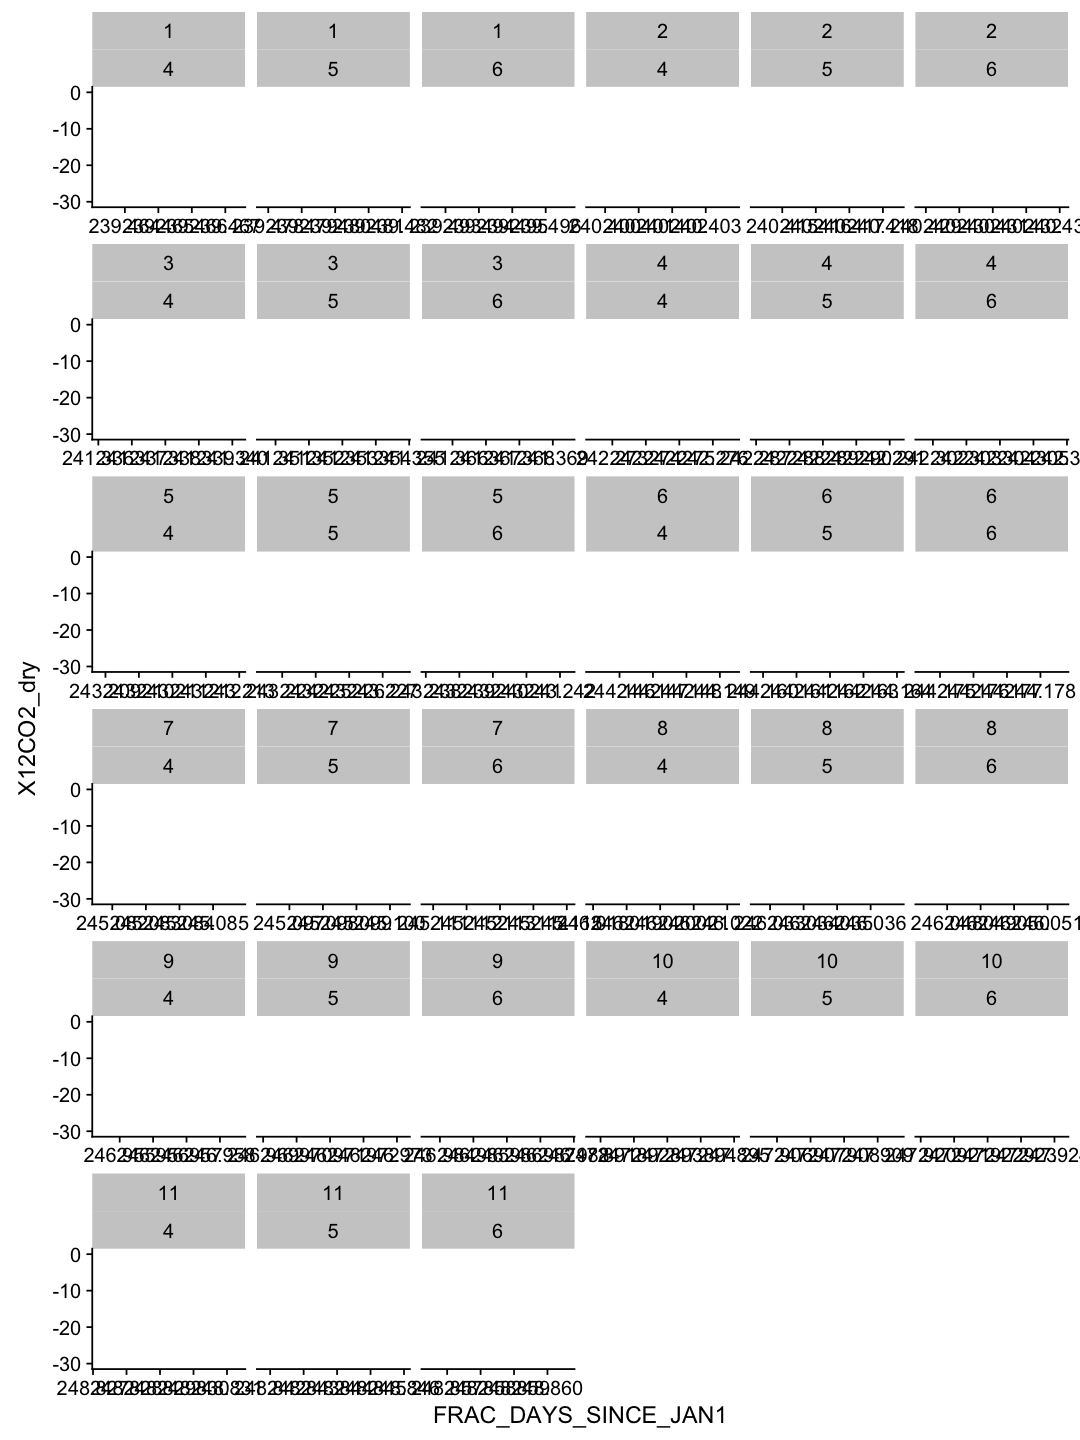

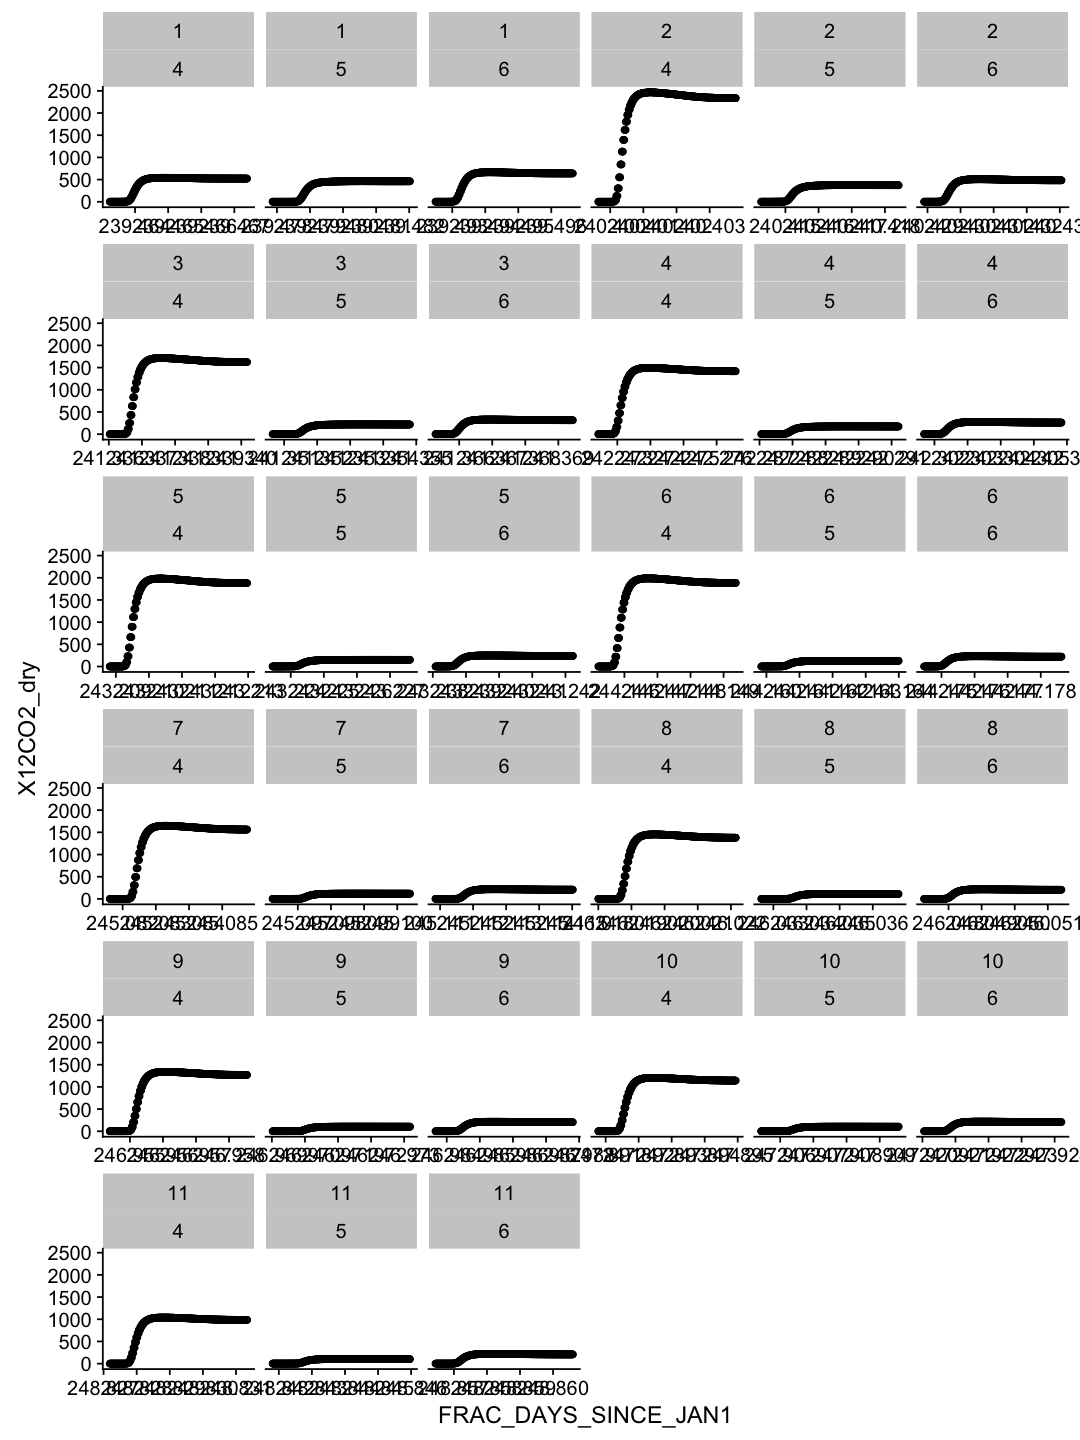

In [8]:
options(repr.plot.width=9, repr.plot.height=12)

# Looking at the data
d = pic.data %>%
    #filter(sample.rep %in% c(2,5,8))%>%
    filter(sample.test %in% c(4,5,6))%>% 
    filter(step=="analysis")
# 58, timepoint 2 is weird
# 61 is off


p = ggplot(d,aes(x=FRAC_DAYS_SINCE_JAN1,y=Delta_Raw_iCO2))
p = ggplot(d,aes(x=FRAC_DAYS_SINCE_JAN1,y=X12CO2_dry))
p = p + geom_point()
p = p + facet_wrap(~sample.rep*sample.test,scales="free_x")
#p = p + ylim(500,600)
#p = p + ylim(0,100)
p = p + ylim(-30,0)
p

#p = ggplot(d,aes(x=FRAC_DAYS_SINCE_JAN1,y=Delta_Raw_iCO2))
p = ggplot(d,aes(x=FRAC_DAYS_SINCE_JAN1,y=X12CO2_dry))
p = p + geom_point()
p = p + facet_wrap(~sample.rep*sample.test,scales="free_x")
#p = p + ylim(500,600)
#p = p + ylim(0,100)
#p = p + ylim(0,2.5)
p

In [41]:
avepoints = 50
    # The number of timepoints we want to have for the average within a given set

testmean = pic.data %>%
    filter(step=="analysis")%>%
    group_by(samprepstep)%>%
    mutate(MaxCO2 = max(CO2tot, na.rm = T))%>%
    top_n(avepoints,FRAC_DAYS_SINCE_JAN1)%>%
    mutate(LateMeanCO2 = mean(CO2tot, na.rm = T))%>%
    mutate(LateMeand13C = mean(Delta_Raw_iCO2, na.rm = T))%>%
    top_n(1,FRAC_DAYS_SINCE_JAN1)%>%
    select(FRAC_DAYS_SINCE_JAN1,sample.test,sample.rep,step,samprep,samprepstep,LateMeanCO2,LateMeand13C,MaxCO2)
    # This groups the data by each sample,replicate, and step, takes the last x datapoints,
    # and calculates their average value for total CO2 and d13C
    # It reports only the final timepoint for each combination.

In [42]:
avepoints = 6

purgemean = pic.data %>%
    filter(step=="purge")%>%
    group_by(samprepstep)%>%
    top_n(avepoints,FRAC_DAYS_SINCE_JAN1)%>%
    mutate(LateMeanCO2 = mean(CO2tot, na.rm = T))%>%
    mutate(LateMeand13C = mean(Delta_Raw_iCO2, na.rm = T))%>%
    top_n(1,FRAC_DAYS_SINCE_JAN1)%>%
    select(FRAC_DAYS_SINCE_JAN1,sample.test,sample.rep,step,samprep,samprepstep,LateMeanCO2,LateMeand13C)
    # This groups the data by each sample,replicate, and step, takes the last x datapoints,
    # and calculates their average value for total CO2 and d13C
    # It reports only the final timepoint for each combination.

purgemean = purgemean[,c("samprep","LateMeanCO2","LateMeand13C")]
setnames(purgemean, 2:3, c("purge.mean.co2", "purge.mean.d13c"))

In [43]:
#############################################################################################################
#  Reduce data to one row per sample measurement  
#############################################################################################################


# Select only the first occurence of the maximum co2 for each sample replicate
short.data = pic.data[CO2tot==maxco2,][, .SD[1], keyby=samprep][step=="analysis"]

# purge.co2 is last value during purge for each samprep
### ARE the samples stabilizing???
purge.data = pic.data[step=="purge" & !is.na(CO2tot), .SD[.N], keyby=samprep][, .(samprep, CO2tot, Delta_Raw_iCO2) ]
  # Selects the columns for each samprep with 12CO2 and the raw d13C
setnames(purge.data, 2:3, c("purge.co2", "purge.d13c"))
  # Gives the columns unique names
short.data = merge(short.data, purge.data, all.x = T)
  # Merges with the short.data so we have purge data as well.

# dilute.co2 is 1st value from each samprep (i.e. concentration in pipework before headspace gas reaches the analyser)
dilute.data = pic.data[step=="analysis" & !is.na(CO2tot), .SD[1], keyby=samprep][, .(samprep, CO2tot, Delta_Raw_iCO2) ]
setnames(dilute.data, 2:3, c("dilute.co2", "dilute.d13c"))
# I think we can use dilute.co2 as a check that there wasn't a tonne of Co2 in the lines,
# But its d13C value is all over the place and can't be trusted - ppm too low.

short.data = merge(short.data, dilute.data, all.x = T)

head(short.data)

samprep     FRAC_DAYS_SINCE_JAN1 X12CO2_dry X13CO2    Delta_Raw_iCO2
1 00001,00001 239.4219             220.44067  2.5128177  14.40447     
2 00001,00002 240.3585              42.27588  0.5813894 223.81655     
3 00001,00003 241.2961              36.53811  0.5508036 341.50613     
4 00001,00004 242.2322              34.84040  0.5269746 346.01067     
5 00001,00005 243.1685              34.76587  0.5188174 328.01588     
6 00001,00006 244.1054              31.11633  0.4770792 364.40723     
  sample.test sample.rep step     samprepstep          CO2tot    maxco2   
1 1           1          analysis 00001,00001,analysis 222.95349 222.95349
2 1           2          analysis 00001,00002,analysis  42.85727  42.85727
3 1           3          analysis 00001,00003,analysis  37.08891  37.08891
4 1           4          analysis 00001,00004,analysis  35.36737  35.36737
5 1           5          analysis 00001,00005,analysis  35.28469  35.28469
6 1           6          analysis 00001,00006,analysis  31.59341  31.59341
  purge.co2 purge.d13c dilute.co2 dilute.d13c
1       NA         NA  0.628219   3456.5446  
2 9.645933   619.0589  1.485186   1072.8120  
3 4.785027  1641.3783  1.423457    798.0453  
4 4.711891  1746.5032  1.375110   1225.8617  
5 4.550633  1932.6725  1.319139   1244.8124  
6 4.632019  1767.3526  1.134211   1316.3849

In [44]:
testmean[!(testmean$samprep %in% short.data$samprep),]
    # Missing only the last couple of blank samples... fine
testmean[!(testmean$samprep %in% dilute.data$samprep),]
    # All there.
head(testmean[!(testmean$samprep %in% purge.data$samprep),])
    # Missing everything from step 11 (because there was no prior purge data)

FRAC_DAYS_SINCE_JAN1 sample.test sample.rep step     samprep    
1 242.1742             61          3          analysis 00061,00003
2 245.9197             61          7          analysis 00061,00007
3 247.7925             61          9          analysis 00061,00009
4 241.2817             64          2          analysis 00064,00002
  samprepstep          LateMeanCO2 LateMeand13C MaxCO2   
1 00061,00003,analysis  9.306660   2362.9332     9.469153
2 00061,00007,analysis  5.423018   1724.6290     5.550147
3 00061,00009,analysis  5.390717   1750.8180     5.543366
4 00064,00002,analysis 69.237300    204.2618    69.385583

FRAC_DAYS_SINCE_JAN1 sample.test sample.rep step samprep samprepstep
     LateMeanCO2 LateMeand13C MaxCO2

FRAC_DAYS_SINCE_JAN1 sample.test sample.rep step     samprep    
1 239.4235             1           1          analysis 00001,00001
2 239.4381             2           1          analysis 00002,00001
3 239.4528             3           1          analysis 00003,00001
4 239.4674             4           1          analysis 00004,00001
5 239.4820             5           1          analysis 00005,00001
6 239.4967             6           1          analysis 00006,00001
  samprepstep          LateMeanCO2 LateMeand13C MaxCO2  
1 00001,00001,analysis 218.6771     18.661525   222.9535
2 00002,00001,analysis 479.9467     -4.400248   501.0167
3 00003,00001,analysis 780.1749    -14.789256   829.4831
4 00004,00001,analysis 529.1686     -5.307050   546.9688
5 00005,00001,analysis 467.1601     56.093451   468.6309
6 00006,00001,analysis 646.9687     -9.390105   672.5806

In [45]:
testmean = testmean[,c("samprep","LateMeanCO2","LateMeand13C")]
setnames(testmean, 2:3, c("mean.co2", "mean.d13c"))
short.data = merge(short.data, testmean, all.x = T)

In [46]:
short.data = merge(short.data, purgemean, all.x = T)

In [47]:
short.data = short.data%>%
    select(samprep,sample.test,sample.rep,FRAC_DAYS_SINCE_JAN1,CO2tot,Delta_Raw_iCO2,purge.co2,purge.d13c,dilute.co2,dilute.d13c,mean.co2,mean.d13c,purge.mean.co2,purge.mean.d13c)
colnames(short.data)[6]="d13c"

In [48]:
# Adding the fraction of volume occupied by sample
short.data <- merge(short.data, frac6, all.x = T, by='sample.test')

In [49]:
# Adding all the sample data
short.data = merge(short.data, SampleData, all.x = T, by='sample.test')
head(short.data)

sample.test samprep     sample.rep FRAC_DAYS_SINCE_JAN1 CO2tot    d13c     
1 1           00001,00001 1          239.4219             222.95349  14.40447
2 1           00001,00002 2          240.3585              42.85727 223.81655
3 1           00001,00003 3          241.2961              37.08891 341.50613
4 1           00001,00004 4          242.2322              35.36737 346.01067
5 1           00001,00005 5          243.1685              35.28469 328.01588
6 1           00001,00006 6          244.1054              31.59341 364.40723
  purge.co2 purge.d13c dilute.co2 dilute.d13c ⋯ anions.bromide anions.nitrate
1       NA         NA  0.628219   3456.5446   ⋯ NA             NA            
2 9.645933   619.0589  1.485186   1072.8120   ⋯ NA             NA            
3 4.785027  1641.3783  1.423457    798.0453   ⋯ NA             NA            
4 4.711891  1746.5032  1.375110   1225.8617   ⋯ NA             NA            
5 4.550633  1932.6725  1.319139   1244.8124   ⋯ NA             NA            
6 4.632019  1767.3526  1.134211   1316.3849   ⋯ NA             NA            
  anions.phosphate anions.sulfate PLFA.bacterial PLFA.actinomycetes PLFA.fungi
1 NA               NA             NA             NA                 NA        
2 NA               NA             NA             NA                 NA        
3 NA               NA             NA             NA                 NA        
4 NA               NA             NA             NA                 NA        
5 NA               NA             NA             NA                 NA        
6 NA               NA             NA             NA                 NA        
  PLFA.fungBactRatio PLFA.actinoBactRatio CNratio
1 NA                 NA                   NA     
2 NA                 NA                   NA     
3 NA                 NA                   NA     
4 NA                 NA                   NA     
5 NA                 NA                   NA     
6 NA                 NA                   NA

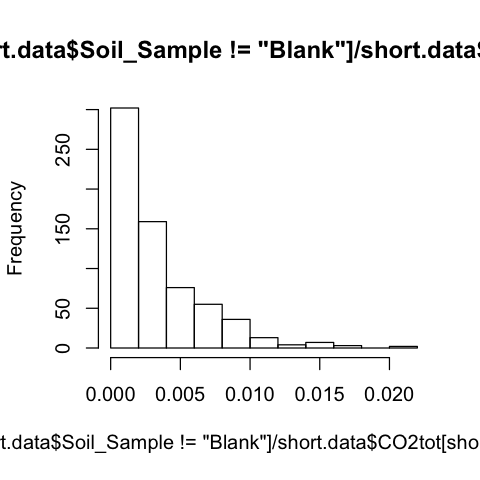

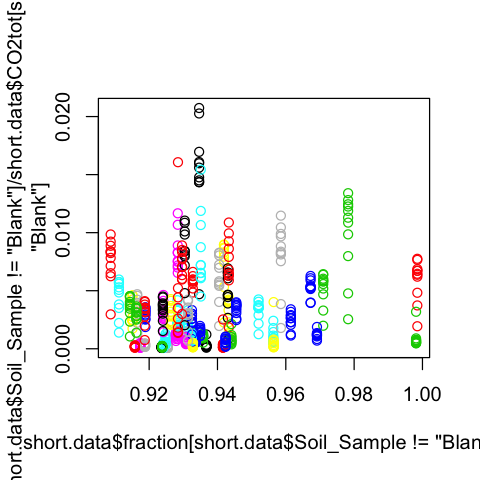

In [50]:
# Check the fraction that the dilute.co2 is of the total co2
options(repr.plot.width=4, repr.plot.height=4)
hist(short.data$dilute.co2[short.data$Soil_Sample!="Blank"] / short.data$CO2tot[short.data$Soil_Sample!="Blank"])

# For the non-blank jars, the maximum values are <2% of the total data.
# So, I'd say we could subtract the CO2, but don't really need to...
# The question is if we can subtract the CO2 without adjusting the d13C.
    # Because we can't adjust the d13C because we don't have confidence in the values...

plot(short.data$fraction[short.data$Soil_Sample!="Blank"],short.data$dilute.co2[short.data$Soil_Sample!="Blank"] / short.data$CO2tot[short.data$Soil_Sample!="Blank"],col=short.data$Soil_Sample[short.data$Soil_Sample!="Blank"])
# It's not really related to the fraction length either...

In [51]:
# headspace CO2 is measured CO2, adjusted for the fraction of CO2 from pipework dilutant
short.data[, headspace.co2  := (CO2tot - (1-fraction) * dilute.co2) / fraction ]
short.data[, headspace.mean.co2  := (mean.co2 - (1-fraction) * dilute.co2) / fraction ]

short.data[, respired.co2 := headspace.co2 - purge.co2]
short.data[, respired.mean.co2 := headspace.mean.co2 - purge.mean.co2]
  # then subtract ppm co2 that was in the jar to begin with

sample.test samprep     sample.rep FRAC_DAYS_SINCE_JAN1 CO2tot    
1   1           00001,00001  1         239.4219             222.95349 
2   1           00001,00002  2         240.3585              42.85727 
3   1           00001,00003  3         241.2961              37.08891 
4   1           00001,00004  4         242.2322              35.36737 
5   1           00001,00005  5         243.1685              35.28469 
6   1           00001,00006  6         244.1054              31.59341 
7   1           00001,00007  7         245.0417              30.25392 
8   1           00001,00008  8         245.9773              29.11924 
9   1           00001,00009  9         246.9145              28.40325 
10  1           00001,00010 10         247.8509              29.74760 
11  1           00001,00011 11         248.7872              29.53941 
12  2           00002,00001  1         239.4356             501.01673 
13  2           00002,00002  2         240.3745             413.70577 
14  2           00002,00003  3         241.3083             207.23870 
15  2           00002,00004  4         242.2447             194.46667 
16  2           00002,00005  5         243.1811             185.10401 
17  2           00002,00006  6         244.1174             172.89926 
18  2           00002,00007  7         245.0540             163.22366 
19  2           00002,00008  8         245.9904             161.82157 
20  2           00002,00009  9         246.9269             159.98970 
21  2           00002,00010 10         247.8632             162.79490 
22  2           00002,00011 11         248.7995             164.63406 
23  3           00003,00001  1         239.4502             829.48313 
24  3           00003,00002  2         240.3866             390.17997 
25  3           00003,00003  3         241.3229             334.75768 
26  3           00003,00004  4         242.2593             250.31911 
27  3           00003,00005  5         243.1957             219.97106 
28  3           00003,00006  6         244.1320             205.27891 
29  3           00003,00007  7         245.0686             188.27358 
30  3           00003,00008  8         246.0050             180.54369 
⋮   ⋮           ⋮           ⋮          ⋮                    ⋮         
671 62          00062,00003  3         242.1888              429.54780
672 62          00062,00004  4         243.1252              317.79275
673 62          00062,00005  5         244.0615              266.95915
674 62          00062,00006  6         244.9980              260.70486
675 62          00062,00007  7         245.9344              247.98461
676 62          00062,00008  8         246.8708              221.01843
677 62          00062,00009  9         247.8071              210.17398
678 62          00062,00010 10         248.7435              205.68502
679 62          00062,00011 11         249.6799              208.97642
680 63          00063,00001  1         240.3298              542.36123
681 63          00063,00002  2         241.2670               58.32680
682 63          00063,00003  3         242.2033               40.03817
683 63          00063,00004  4         243.1398               35.81601
684 63          00063,00005  5         244.0761               25.15564
685 63          00063,00006  6         245.0125               22.87203
686 63          00063,00007  7         245.9489               23.73628
687 63          00063,00008  8         246.8852               23.57606
688 63          00063,00009  9         247.8218               25.67306
689 63          00063,00010 10         248.7579               26.11962
690 63          00063,00011 11         249.6943               26.32684
691 64          00064,00001  1         240.3451             1328.27348
692 64          00064,00003  3         242.2180               48.91324
693 64          00064,00004  4         243.1542               48.63372
694 64          00064,00005  5         244.0908               44.47765
695 64          00064,00006 

sample.test samprep     sample.rep FRAC_DAYS_SINCE_JAN1 CO2tot    
1   1           00001,00001  1         239.4219             222.95349 
2   1           00001,00002  2         240.3585              42.85727 
3   1           00001,00003  3         241.2961              37.08891 
4   1           00001,00004  4         242.2322              35.36737 
5   1           00001,00005  5         243.1685              35.28469 
6   1           00001,00006  6         244.1054              31.59341 
7   1           00001,00007  7         245.0417              30.25392 
8   1           00001,00008  8         245.9773              29.11924 
9   1           00001,00009  9         246.9145              28.40325 
10  1           00001,00010 10         247.8509              29.74760 
11  1           00001,00011 11         248.7872              29.53941 
12  2           00002,00001  1         239.4356             501.01673 
13  2           00002,00002  2         240.3745             413.70577 
14  2           00002,00003  3         241.3083             207.23870 
15  2           00002,00004  4         242.2447             194.46667 
16  2           00002,00005  5         243.1811             185.10401 
17  2           00002,00006  6         244.1174             172.89926 
18  2           00002,00007  7         245.0540             163.22366 
19  2           00002,00008  8         245.9904             161.82157 
20  2           00002,00009  9         246.9269             159.98970 
21  2           00002,00010 10         247.8632             162.79490 
22  2           00002,00011 11         248.7995             164.63406 
23  3           00003,00001  1         239.4502             829.48313 
24  3           00003,00002  2         240.3866             390.17997 
25  3           00003,00003  3         241.3229             334.75768 
26  3           00003,00004  4         242.2593             250.31911 
27  3           00003,00005  5         243.1957             219.97106 
28  3           00003,00006  6         244.1320             205.27891 
29  3           00003,00007  7         245.0686             188.27358 
30  3           00003,00008  8         246.0050             180.54369 
⋮   ⋮           ⋮           ⋮          ⋮                    ⋮         
671 62          00062,00003  3         242.1888              429.54780
672 62          00062,00004  4         243.1252              317.79275
673 62          00062,00005  5         244.0615              266.95915
674 62          00062,00006  6         244.9980              260.70486
675 62          00062,00007  7         245.9344              247.98461
676 62          00062,00008  8         246.8708              221.01843
677 62          00062,00009  9         247.8071              210.17398
678 62          00062,00010 10         248.7435              205.68502
679 62          00062,00011 11         249.6799              208.97642
680 63          00063,00001  1         240.3298              542.36123
681 63          00063,00002  2         241.2670               58.32680
682 63          00063,00003  3         242.2033               40.03817
683 63          00063,00004  4         243.1398               35.81601
684 63          00063,00005  5         244.0761               25.15564
685 63          00063,00006  6         245.0125               22.87203
686 63          00063,00007  7         245.9489               23.73628
687 63          00063,00008  8         246.8852               23.57606
688 63          00063,00009  9         247.8218               25.67306
689 63          00063,00010 10         248.7579               26.11962
690 63          00063,00011 11         249.6943               26.32684
691 64          00064,00001  1         240.3451             1328.27348
692 64          00064,00003  3         242.2180               48.91324
693 64          00064,00004  4         243.1542               48.63372
694 64          00064,00005  5         244.0908               44.47765
695 64          00064,00006 

sample.test samprep     sample.rep FRAC_DAYS_SINCE_JAN1 CO2tot    
1   1           00001,00001  1         239.4219             222.95349 
2   1           00001,00002  2         240.3585              42.85727 
3   1           00001,00003  3         241.2961              37.08891 
4   1           00001,00004  4         242.2322              35.36737 
5   1           00001,00005  5         243.1685              35.28469 
6   1           00001,00006  6         244.1054              31.59341 
7   1           00001,00007  7         245.0417              30.25392 
8   1           00001,00008  8         245.9773              29.11924 
9   1           00001,00009  9         246.9145              28.40325 
10  1           00001,00010 10         247.8509              29.74760 
11  1           00001,00011 11         248.7872              29.53941 
12  2           00002,00001  1         239.4356             501.01673 
13  2           00002,00002  2         240.3745             413.70577 
14  2           00002,00003  3         241.3083             207.23870 
15  2           00002,00004  4         242.2447             194.46667 
16  2           00002,00005  5         243.1811             185.10401 
17  2           00002,00006  6         244.1174             172.89926 
18  2           00002,00007  7         245.0540             163.22366 
19  2           00002,00008  8         245.9904             161.82157 
20  2           00002,00009  9         246.9269             159.98970 
21  2           00002,00010 10         247.8632             162.79490 
22  2           00002,00011 11         248.7995             164.63406 
23  3           00003,00001  1         239.4502             829.48313 
24  3           00003,00002  2         240.3866             390.17997 
25  3           00003,00003  3         241.3229             334.75768 
26  3           00003,00004  4         242.2593             250.31911 
27  3           00003,00005  5         243.1957             219.97106 
28  3           00003,00006  6         244.1320             205.27891 
29  3           00003,00007  7         245.0686             188.27358 
30  3           00003,00008  8         246.0050             180.54369 
⋮   ⋮           ⋮           ⋮          ⋮                    ⋮         
671 62          00062,00003  3         242.1888              429.54780
672 62          00062,00004  4         243.1252              317.79275
673 62          00062,00005  5         244.0615              266.95915
674 62          00062,00006  6         244.9980              260.70486
675 62          00062,00007  7         245.9344              247.98461
676 62          00062,00008  8         246.8708              221.01843
677 62          00062,00009  9         247.8071              210.17398
678 62          00062,00010 10         248.7435              205.68502
679 62          00062,00011 11         249.6799              208.97642
680 63          00063,00001  1         240.3298              542.36123
681 63          00063,00002  2         241.2670               58.32680
682 63          00063,00003  3         242.2033               40.03817
683 63          00063,00004  4         243.1398               35.81601
684 63          00063,00005  5         244.0761               25.15564
685 63          00063,00006  6         245.0125               22.87203
686 63          00063,00007  7         245.9489               23.73628
687 63          00063,00008  8         246.8852               23.57606
688 63          00063,00009  9         247.8218               25.67306
689 63          00063,00010 10         248.7579               26.11962
690 63          00063,00011 11         249.6943               26.32684
691 64          00064,00001  1         240.3451             1328.27348
692 64          00064,00003  3         242.2180               48.91324
693 64          00064,00004  4         243.1542               48.63372
694 64          00064,00005  5         244.0908               44.47765
695 64          00064,00006 

sample.test samprep     sample.rep FRAC_DAYS_SINCE_JAN1 CO2tot    
1   1           00001,00001  1         239.4219             222.95349 
2   1           00001,00002  2         240.3585              42.85727 
3   1           00001,00003  3         241.2961              37.08891 
4   1           00001,00004  4         242.2322              35.36737 
5   1           00001,00005  5         243.1685              35.28469 
6   1           00001,00006  6         244.1054              31.59341 
7   1           00001,00007  7         245.0417              30.25392 
8   1           00001,00008  8         245.9773              29.11924 
9   1           00001,00009  9         246.9145              28.40325 
10  1           00001,00010 10         247.8509              29.74760 
11  1           00001,00011 11         248.7872              29.53941 
12  2           00002,00001  1         239.4356             501.01673 
13  2           00002,00002  2         240.3745             413.70577 
14  2           00002,00003  3         241.3083             207.23870 
15  2           00002,00004  4         242.2447             194.46667 
16  2           00002,00005  5         243.1811             185.10401 
17  2           00002,00006  6         244.1174             172.89926 
18  2           00002,00007  7         245.0540             163.22366 
19  2           00002,00008  8         245.9904             161.82157 
20  2           00002,00009  9         246.9269             159.98970 
21  2           00002,00010 10         247.8632             162.79490 
22  2           00002,00011 11         248.7995             164.63406 
23  3           00003,00001  1         239.4502             829.48313 
24  3           00003,00002  2         240.3866             390.17997 
25  3           00003,00003  3         241.3229             334.75768 
26  3           00003,00004  4         242.2593             250.31911 
27  3           00003,00005  5         243.1957             219.97106 
28  3           00003,00006  6         244.1320             205.27891 
29  3           00003,00007  7         245.0686             188.27358 
30  3           00003,00008  8         246.0050             180.54369 
⋮   ⋮           ⋮           ⋮          ⋮                    ⋮         
671 62          00062,00003  3         242.1888              429.54780
672 62          00062,00004  4         243.1252              317.79275
673 62          00062,00005  5         244.0615              266.95915
674 62          00062,00006  6         244.9980              260.70486
675 62          00062,00007  7         245.9344              247.98461
676 62          00062,00008  8         246.8708              221.01843
677 62          00062,00009  9         247.8071              210.17398
678 62          00062,00010 10         248.7435              205.68502
679 62          00062,00011 11         249.6799              208.97642
680 63          00063,00001  1         240.3298              542.36123
681 63          00063,00002  2         241.2670               58.32680
682 63          00063,00003  3         242.2033               40.03817
683 63          00063,00004  4         243.1398               35.81601
684 63          00063,00005  5         244.0761               25.15564
685 63          00063,00006  6         245.0125               22.87203
686 63          00063,00007  7         245.9489               23.73628
687 63          00063,00008  8         246.8852               23.57606
688 63          00063,00009  9         247.8218               25.67306
689 63          00063,00010 10         248.7579               26.11962
690 63          00063,00011 11         249.6943               26.32684
691 64          00064,00001  1         240.3451             1328.27348
692 64          00064,00003  3         242.2180               48.91324
693 64          00064,00004  4         243.1542               48.63372
694 64          00064,00005  5         244.0908               44.47765
695 64          00064,00006 

In [52]:
# So, we have the headspace co2, which is the co2 minus whatever was in the pipeline at the start of analysis
# We have the respired co2, which is the co2 minus the pipeline, minus the values when the valves closed
    # at the end of the previous timepoint.
# Now we need to calculate what the d13C of the respired co2 should be, by subtracting the purge co2 13C

In [53]:
#d13c = fPurged*d13CPurged + fRespired*d13CRespired
#d13C - fPurged*d13CPurged = fRespired*d13CRespired
#d13C - fPurged*d13CPurged = (1-fPurged)*d13CRespired
#(d13C - fPurged*d13CPurged) / (1-fPurged) = d13CRespired

short.data[, fPurged.mean := purge.mean.co2/headspace.mean.co2]
short.data[, fPurged := purge.co2/headspace.co2]
# Calculate the fPurged; we have d13C, we have d13CPurged.

short.data[, respired.d13c := ((d13c-fPurged*purge.d13c) / (1-fPurged))]
short.data[, respired.mean.d13c := ((mean.d13c-fPurged.mean*purge.mean.d13c) / (1-fPurged.mean))]

sample.test samprep     sample.rep FRAC_DAYS_SINCE_JAN1 CO2tot    
1   1           00001,00001  1         239.4219             222.95349 
2   1           00001,00002  2         240.3585              42.85727 
3   1           00001,00003  3         241.2961              37.08891 
4   1           00001,00004  4         242.2322              35.36737 
5   1           00001,00005  5         243.1685              35.28469 
6   1           00001,00006  6         244.1054              31.59341 
7   1           00001,00007  7         245.0417              30.25392 
8   1           00001,00008  8         245.9773              29.11924 
9   1           00001,00009  9         246.9145              28.40325 
10  1           00001,00010 10         247.8509              29.74760 
11  1           00001,00011 11         248.7872              29.53941 
12  2           00002,00001  1         239.4356             501.01673 
13  2           00002,00002  2         240.3745             413.70577 
14  2           00002,00003  3         241.3083             207.23870 
15  2           00002,00004  4         242.2447             194.46667 
16  2           00002,00005  5         243.1811             185.10401 
17  2           00002,00006  6         244.1174             172.89926 
18  2           00002,00007  7         245.0540             163.22366 
19  2           00002,00008  8         245.9904             161.82157 
20  2           00002,00009  9         246.9269             159.98970 
21  2           00002,00010 10         247.8632             162.79490 
22  2           00002,00011 11         248.7995             164.63406 
23  3           00003,00001  1         239.4502             829.48313 
24  3           00003,00002  2         240.3866             390.17997 
25  3           00003,00003  3         241.3229             334.75768 
26  3           00003,00004  4         242.2593             250.31911 
27  3           00003,00005  5         243.1957             219.97106 
28  3           00003,00006  6         244.1320             205.27891 
29  3           00003,00007  7         245.0686             188.27358 
30  3           00003,00008  8         246.0050             180.54369 
⋮   ⋮           ⋮           ⋮          ⋮                    ⋮         
671 62          00062,00003  3         242.1888              429.54780
672 62          00062,00004  4         243.1252              317.79275
673 62          00062,00005  5         244.0615              266.95915
674 62          00062,00006  6         244.9980              260.70486
675 62          00062,00007  7         245.9344              247.98461
676 62          00062,00008  8         246.8708              221.01843
677 62          00062,00009  9         247.8071              210.17398
678 62          00062,00010 10         248.7435              205.68502
679 62          00062,00011 11         249.6799              208.97642
680 63          00063,00001  1         240.3298              542.36123
681 63          00063,00002  2         241.2670               58.32680
682 63          00063,00003  3         242.2033               40.03817
683 63          00063,00004  4         243.1398               35.81601
684 63          00063,00005  5         244.0761               25.15564
685 63          00063,00006  6         245.0125               22.87203
686 63          00063,00007  7         245.9489               23.73628
687 63          00063,00008  8         246.8852               23.57606
688 63          00063,00009  9         247.8218               25.67306
689 63          00063,00010 10         248.7579               26.11962
690 63          00063,00011 11         249.6943               26.32684
691 64          00064,00001  1         240.3451             1328.27348
692 64          00064,00003  3         242.2180               48.91324
693 64          00064,00004  4         243.1542               48.63372
694 64          00064,00005  5         244.0908               44.47765
695 64          00064,00006 

sample.test samprep     sample.rep FRAC_DAYS_SINCE_JAN1 CO2tot    
1   1           00001,00001  1         239.4219             222.95349 
2   1           00001,00002  2         240.3585              42.85727 
3   1           00001,00003  3         241.2961              37.08891 
4   1           00001,00004  4         242.2322              35.36737 
5   1           00001,00005  5         243.1685              35.28469 
6   1           00001,00006  6         244.1054              31.59341 
7   1           00001,00007  7         245.0417              30.25392 
8   1           00001,00008  8         245.9773              29.11924 
9   1           00001,00009  9         246.9145              28.40325 
10  1           00001,00010 10         247.8509              29.74760 
11  1           00001,00011 11         248.7872              29.53941 
12  2           00002,00001  1         239.4356             501.01673 
13  2           00002,00002  2         240.3745             413.70577 
14  2           00002,00003  3         241.3083             207.23870 
15  2           00002,00004  4         242.2447             194.46667 
16  2           00002,00005  5         243.1811             185.10401 
17  2           00002,00006  6         244.1174             172.89926 
18  2           00002,00007  7         245.0540             163.22366 
19  2           00002,00008  8         245.9904             161.82157 
20  2           00002,00009  9         246.9269             159.98970 
21  2           00002,00010 10         247.8632             162.79490 
22  2           00002,00011 11         248.7995             164.63406 
23  3           00003,00001  1         239.4502             829.48313 
24  3           00003,00002  2         240.3866             390.17997 
25  3           00003,00003  3         241.3229             334.75768 
26  3           00003,00004  4         242.2593             250.31911 
27  3           00003,00005  5         243.1957             219.97106 
28  3           00003,00006  6         244.1320             205.27891 
29  3           00003,00007  7         245.0686             188.27358 
30  3           00003,00008  8         246.0050             180.54369 
⋮   ⋮           ⋮           ⋮          ⋮                    ⋮         
671 62          00062,00003  3         242.1888              429.54780
672 62          00062,00004  4         243.1252              317.79275
673 62          00062,00005  5         244.0615              266.95915
674 62          00062,00006  6         244.9980              260.70486
675 62          00062,00007  7         245.9344              247.98461
676 62          00062,00008  8         246.8708              221.01843
677 62          00062,00009  9         247.8071              210.17398
678 62          00062,00010 10         248.7435              205.68502
679 62          00062,00011 11         249.6799              208.97642
680 63          00063,00001  1         240.3298              542.36123
681 63          00063,00002  2         241.2670               58.32680
682 63          00063,00003  3         242.2033               40.03817
683 63          00063,00004  4         243.1398               35.81601
684 63          00063,00005  5         244.0761               25.15564
685 63          00063,00006  6         245.0125               22.87203
686 63          00063,00007  7         245.9489               23.73628
687 63          00063,00008  8         246.8852               23.57606
688 63          00063,00009  9         247.8218               25.67306
689 63          00063,00010 10         248.7579               26.11962
690 63          00063,00011 11         249.6943               26.32684
691 64          00064,00001  1         240.3451             1328.27348
692 64          00064,00003  3         242.2180               48.91324
693 64          00064,00004  4         243.1542               48.63372
694 64          00064,00005  5         244.0908               44.47765
695 64          00064,00006 

sample.test samprep     sample.rep FRAC_DAYS_SINCE_JAN1 CO2tot    
1   1           00001,00001  1         239.4219             222.95349 
2   1           00001,00002  2         240.3585              42.85727 
3   1           00001,00003  3         241.2961              37.08891 
4   1           00001,00004  4         242.2322              35.36737 
5   1           00001,00005  5         243.1685              35.28469 
6   1           00001,00006  6         244.1054              31.59341 
7   1           00001,00007  7         245.0417              30.25392 
8   1           00001,00008  8         245.9773              29.11924 
9   1           00001,00009  9         246.9145              28.40325 
10  1           00001,00010 10         247.8509              29.74760 
11  1           00001,00011 11         248.7872              29.53941 
12  2           00002,00001  1         239.4356             501.01673 
13  2           00002,00002  2         240.3745             413.70577 
14  2           00002,00003  3         241.3083             207.23870 
15  2           00002,00004  4         242.2447             194.46667 
16  2           00002,00005  5         243.1811             185.10401 
17  2           00002,00006  6         244.1174             172.89926 
18  2           00002,00007  7         245.0540             163.22366 
19  2           00002,00008  8         245.9904             161.82157 
20  2           00002,00009  9         246.9269             159.98970 
21  2           00002,00010 10         247.8632             162.79490 
22  2           00002,00011 11         248.7995             164.63406 
23  3           00003,00001  1         239.4502             829.48313 
24  3           00003,00002  2         240.3866             390.17997 
25  3           00003,00003  3         241.3229             334.75768 
26  3           00003,00004  4         242.2593             250.31911 
27  3           00003,00005  5         243.1957             219.97106 
28  3           00003,00006  6         244.1320             205.27891 
29  3           00003,00007  7         245.0686             188.27358 
30  3           00003,00008  8         246.0050             180.54369 
⋮   ⋮           ⋮           ⋮          ⋮                    ⋮         
671 62          00062,00003  3         242.1888              429.54780
672 62          00062,00004  4         243.1252              317.79275
673 62          00062,00005  5         244.0615              266.95915
674 62          00062,00006  6         244.9980              260.70486
675 62          00062,00007  7         245.9344              247.98461
676 62          00062,00008  8         246.8708              221.01843
677 62          00062,00009  9         247.8071              210.17398
678 62          00062,00010 10         248.7435              205.68502
679 62          00062,00011 11         249.6799              208.97642
680 63          00063,00001  1         240.3298              542.36123
681 63          00063,00002  2         241.2670               58.32680
682 63          00063,00003  3         242.2033               40.03817
683 63          00063,00004  4         243.1398               35.81601
684 63          00063,00005  5         244.0761               25.15564
685 63          00063,00006  6         245.0125               22.87203
686 63          00063,00007  7         245.9489               23.73628
687 63          00063,00008  8         246.8852               23.57606
688 63          00063,00009  9         247.8218               25.67306
689 63          00063,00010 10         248.7579               26.11962
690 63          00063,00011 11         249.6943               26.32684
691 64          00064,00001  1         240.3451             1328.27348
692 64          00064,00003  3         242.2180               48.91324
693 64          00064,00004  4         243.1542               48.63372
694 64          00064,00005  5         244.0908               44.47765
695 64          00064,00006 

sample.test samprep     sample.rep FRAC_DAYS_SINCE_JAN1 CO2tot    
1   1           00001,00001  1         239.4219             222.95349 
2   1           00001,00002  2         240.3585              42.85727 
3   1           00001,00003  3         241.2961              37.08891 
4   1           00001,00004  4         242.2322              35.36737 
5   1           00001,00005  5         243.1685              35.28469 
6   1           00001,00006  6         244.1054              31.59341 
7   1           00001,00007  7         245.0417              30.25392 
8   1           00001,00008  8         245.9773              29.11924 
9   1           00001,00009  9         246.9145              28.40325 
10  1           00001,00010 10         247.8509              29.74760 
11  1           00001,00011 11         248.7872              29.53941 
12  2           00002,00001  1         239.4356             501.01673 
13  2           00002,00002  2         240.3745             413.70577 
14  2           00002,00003  3         241.3083             207.23870 
15  2           00002,00004  4         242.2447             194.46667 
16  2           00002,00005  5         243.1811             185.10401 
17  2           00002,00006  6         244.1174             172.89926 
18  2           00002,00007  7         245.0540             163.22366 
19  2           00002,00008  8         245.9904             161.82157 
20  2           00002,00009  9         246.9269             159.98970 
21  2           00002,00010 10         247.8632             162.79490 
22  2           00002,00011 11         248.7995             164.63406 
23  3           00003,00001  1         239.4502             829.48313 
24  3           00003,00002  2         240.3866             390.17997 
25  3           00003,00003  3         241.3229             334.75768 
26  3           00003,00004  4         242.2593             250.31911 
27  3           00003,00005  5         243.1957             219.97106 
28  3           00003,00006  6         244.1320             205.27891 
29  3           00003,00007  7         245.0686             188.27358 
30  3           00003,00008  8         246.0050             180.54369 
⋮   ⋮           ⋮           ⋮          ⋮                    ⋮         
671 62          00062,00003  3         242.1888              429.54780
672 62          00062,00004  4         243.1252              317.79275
673 62          00062,00005  5         244.0615              266.95915
674 62          00062,00006  6         244.9980              260.70486
675 62          00062,00007  7         245.9344              247.98461
676 62          00062,00008  8         246.8708              221.01843
677 62          00062,00009  9         247.8071              210.17398
678 62          00062,00010 10         248.7435              205.68502
679 62          00062,00011 11         249.6799              208.97642
680 63          00063,00001  1         240.3298              542.36123
681 63          00063,00002  2         241.2670               58.32680
682 63          00063,00003  3         242.2033               40.03817
683 63          00063,00004  4         243.1398               35.81601
684 63          00063,00005  5         244.0761               25.15564
685 63          00063,00006  6         245.0125               22.87203
686 63          00063,00007  7         245.9489               23.73628
687 63          00063,00008  8         246.8852               23.57606
688 63          00063,00009  9         247.8218               25.67306
689 63          00063,00010 10         248.7579               26.11962
690 63          00063,00011 11         249.6943               26.32684
691 64          00064,00001  1         240.3451             1328.27348
692 64          00064,00003  3         242.2180               48.91324
693 64          00064,00004  4         243.1542               48.63372
694 64          00064,00005  5         244.0908               44.47765
695 64          00064,00006 

In [54]:
# Next, we need to select the relevant mean to which to compare the amended soils.
# Including options - mean is whether I took the mean values during the measurement cycle
#    - paired is whether I took only the exact soil sample, to match (as opposed to average of all soils
#       at that timepoint)

for (i in 1:dim(short.data )[1]){
    Soil_Trtmt = short.data $Soil_Trtmt[i]
    Soil_Sample = short.data $Soil_Sample[i]
    sample.rep = short.data $sample.rep[i]
    short.data$ref.d13c[i] = mean(short.data $respired.d13c[short.data $Amdmt=="Soil" 
                                               & short.data $Soil_Trtmt == Soil_Trtmt 
                                              & short.data $sample.rep == sample.rep], na.rm=TRUE)
    short.data$ref.mean.d13c[i] = mean(short.data $respired.mean.d13c[short.data $Amdmt=="Soil" 
                                            & short.data $Soil_Trtmt == Soil_Trtmt 
                                              & short.data $sample.rep == sample.rep], na.rm=TRUE)
    short.data$ref.paired.d13c[i] = mean(short.data $respired.d13c[short.data $Amdmt=="Soil" 
                                               & short.data $Soil_Sample == Soil_Sample 
                                              & short.data $sample.rep == sample.rep], na.rm=TRUE)
    short.data$ref.paired.mean.d13c[i] = mean(short.data $respired.mean.d13c[short.data $Amdmt=="Soil" 
                                            & short.data $Soil_Sample == Soil_Sample 
                                              & short.data $sample.rep == sample.rep], na.rm=TRUE)
    short.data$ref.co2[i] = mean(short.data $respired.co2[short.data $Amdmt=="Soil" 
                                               & short.data $Soil_Trtmt == Soil_Trtmt 
                                              & short.data $sample.rep == sample.rep], na.rm=TRUE)
    short.data$ref.mean.co2[i] = mean(short.data $respired.mean.co2[short.data $Amdmt=="Soil" 
                                            & short.data $Soil_Trtmt == Soil_Trtmt 
                                              & short.data $sample.rep == sample.rep], na.rm=TRUE)
    short.data$ref.paired.co2[i] = mean(short.data $respired.co2[short.data $Amdmt=="Soil" 
                                               & short.data $Soil_Sample == Soil_Sample 
                                              & short.data $sample.rep == sample.rep], na.rm=TRUE)
    short.data$ref.paired.mean.co2[i] = mean(short.data $respired.mean.co2[short.data $Amdmt=="Soil" 
                                            & short.data $Soil_Sample == Soil_Sample 
                                              & short.data $sample.rep == sample.rep], na.rm=TRUE)
    
    
}
short.data  = short.data  %>%
    arrange(Soil_Trtmt,sample.rep,Amdmt)
#short.data [test$Soil_Trtmt=="AK",]

In [55]:
# Then, the next step is to do the actual partitioning.
# This is probably easiest to do selecting which options we want, otherwise too many values.
# However, it's really whether it's paired or mean.

## Calculations:

#d13Ctot = d13Csoil*fractSoil + d13Camdmt*fractAmdmt
#d13Ctot = d13Csoil*fractSoil + d13Camdmt*(1-fractSoil)
#d13Ctot = d13Csoil*fractSoil + d13Camdmt-d13Camdmt*fractSoil
#d13Ctot - d13Camdmt = (d13Csoil-d13Camdmt)*fractSoil
#(d13Ctot - d13Camdmt) / (d13Csoil-d13Camdmt) = fractSoil

## Basic method (max), not paired ref soil d13C
for (i in 1:dim(short.data)[1]){
    if (is.na(short.data$Amdmt[i])){
        short.data$fractSoil[i] = 1
    }
    if (short.data$Amdmt[i] %in% c("PyOM","OM")){
        d13Ctot = short.data$respired.d13c[i]
        #d13Ctot = short.data$respired.mean.d13C[i]
        
        d13Camdmt = short.data$Amdmt_d13C[i]

        d13Csoil = short.data$ref.d13c[i]
        #d13Csoil = short.data$ref.mean.d13c[i]
        #d13Csoil = short.data$ref.paired.d13c[i]
        #d13Csoil = short.data$ref.paired.meand13c[i]
        
        short.data$fractSoil[i] = ((d13Ctot - d13Camdmt) / (d13Csoil-d13Camdmt))
        }
    else {short.data$fractSoil[i] = 1}
    }

## Basic method (max), with paired ref soil d13C
for (i in 1:dim(short.data)[1]){
    if (is.na(short.data$Amdmt[i])){
        short.data$fractSoil.paired[i] = 1
    }
    if (short.data$Amdmt[i] %in% c("PyOM","OM")){
        d13Ctot = short.data$respired.d13c[i]
        #d13Ctot = short.data$respired.mean.d13C[i]
        
        d13Camdmt = short.data$Amdmt_d13C[i]

        #d13Csoil = short.data$ref.d13c[i]
        #d13Csoil = short.data$ref.mean.d13c[i]
        d13Csoil = short.data$ref.paired.d13c[i]
        #d13Csoil = short.data$ref.paired.meand13c[i]
        
        short.data$fractSoil.paired[i] = ((d13Ctot - d13Camdmt) / (d13Csoil-d13Camdmt))
        }
    else {short.data$fractSoil.paired[i] = 1}
    }

## Mean, not paired ref soil d13C
for (i in 1:dim(short.data)[1]){
    if (is.na(short.data$Amdmt[i])){
        short.data$fractSoil.mean[i] = 1
    }
    if (short.data$Amdmt[i] %in% c("PyOM","OM")){
        #d13Ctot = short.data$respired.d13c[i]
        d13Ctot = short.data$respired.mean.d13c[i]
        
        d13Camdmt = short.data$Amdmt_d13C[i]

        #d13Csoil = short.data$ref.d13c[i]
        d13Csoil = short.data$ref.mean.d13c[i]
        #d13Csoil = short.data$ref.paired.d13c[i]
        #d13Csoil = short.data$ref.paired.meand13c[i]
        
        short.data$fractSoil.mean[i] = ((d13Ctot - d13Camdmt) / (d13Csoil-d13Camdmt))
        }
    else {short.data$fractSoil.mean[i] = 1}
    }

## Mean, with paired ref soil d13C
for (i in 1:dim(short.data)[1]){
    if (is.na(short.data$Amdmt[i])){
        short.data$fractSoil.paired.mean[i] = 1
    }
    if (short.data$Amdmt[i] %in% c("PyOM","OM")){
        #d13Ctot = short.data$respired.d13c[i]
        d13Ctot = short.data$respired.mean.d13c[i]
        
        d13Camdmt = short.data$Amdmt_d13C[i]

        #d13Csoil = short.data$ref.d13c[i]
        #d13Csoil = short.data$ref.mean.d13c[i]
        #d13Csoil = short.data$ref.paired.d13c[i]
        d13Csoil = short.data$ref.paired.mean.d13c[i]
        
        short.data$fractSoil.paired.mean[i] = ((d13Ctot - d13Camdmt) / (d13Csoil-d13Camdmt))
        }
    else {short.data$fractSoil.paired.mean[i] = 1}
    }


In [56]:
min(short.data$fractSoil[short.data$Amdmt=="PyOM"], na.rm=TRUE)
max(short.data$fractSoil[short.data$Amdmt=="PyOM"], na.rm=TRUE)
min(short.data$fractSoil[short.data$Amdmt=="OM"], na.rm=TRUE)
max(short.data$fractSoil[short.data$Amdmt=="OM"], na.rm=TRUE)
min(short.data$fractSoil[short.data$Amdmt=="Soil"], na.rm=TRUE)
max(short.data$fractSoil[short.data$Amdmt=="Soil"], na.rm=TRUE)
# Ok, so no negative values - that's good.

[1] 0.3889832

[1] 0.9923418

[1] 0.04872217

[1] 0.7949643

[1] 1

[1] 1

In [57]:
short.data$Soil.CO2 = short.data$respired.co2 * short.data$fractSoil
short.data$Amdmt.CO2 = short.data$respired.co2 * (1-short.data$fractSoil)

short.data$Soil.CO2.paired = short.data$respired.co2 * short.data$fractSoil.paired
short.data$Amdmt.CO2.paired = short.data$respired.co2 * (1-short.data$fractSoil.paired)

short.data$Soil.CO2.mean = short.data$respired.mean.co2 * short.data$fractSoil.mean
short.data$Amdmt.CO2.mean = short.data$respired.mean.co2 * (1-short.data$fractSoil.mean)

short.data$Soil.CO2.paired.mean = short.data$respired.mean.co2 * short.data$fractSoil.paired.mean
short.data$Amdmt.CO2.paired.mean = short.data$respired.mean.co2 * (1-short.data$fractSoil.paired.mean)

Warning message:
“Removed 60 rows containing missing values (geom_point).”

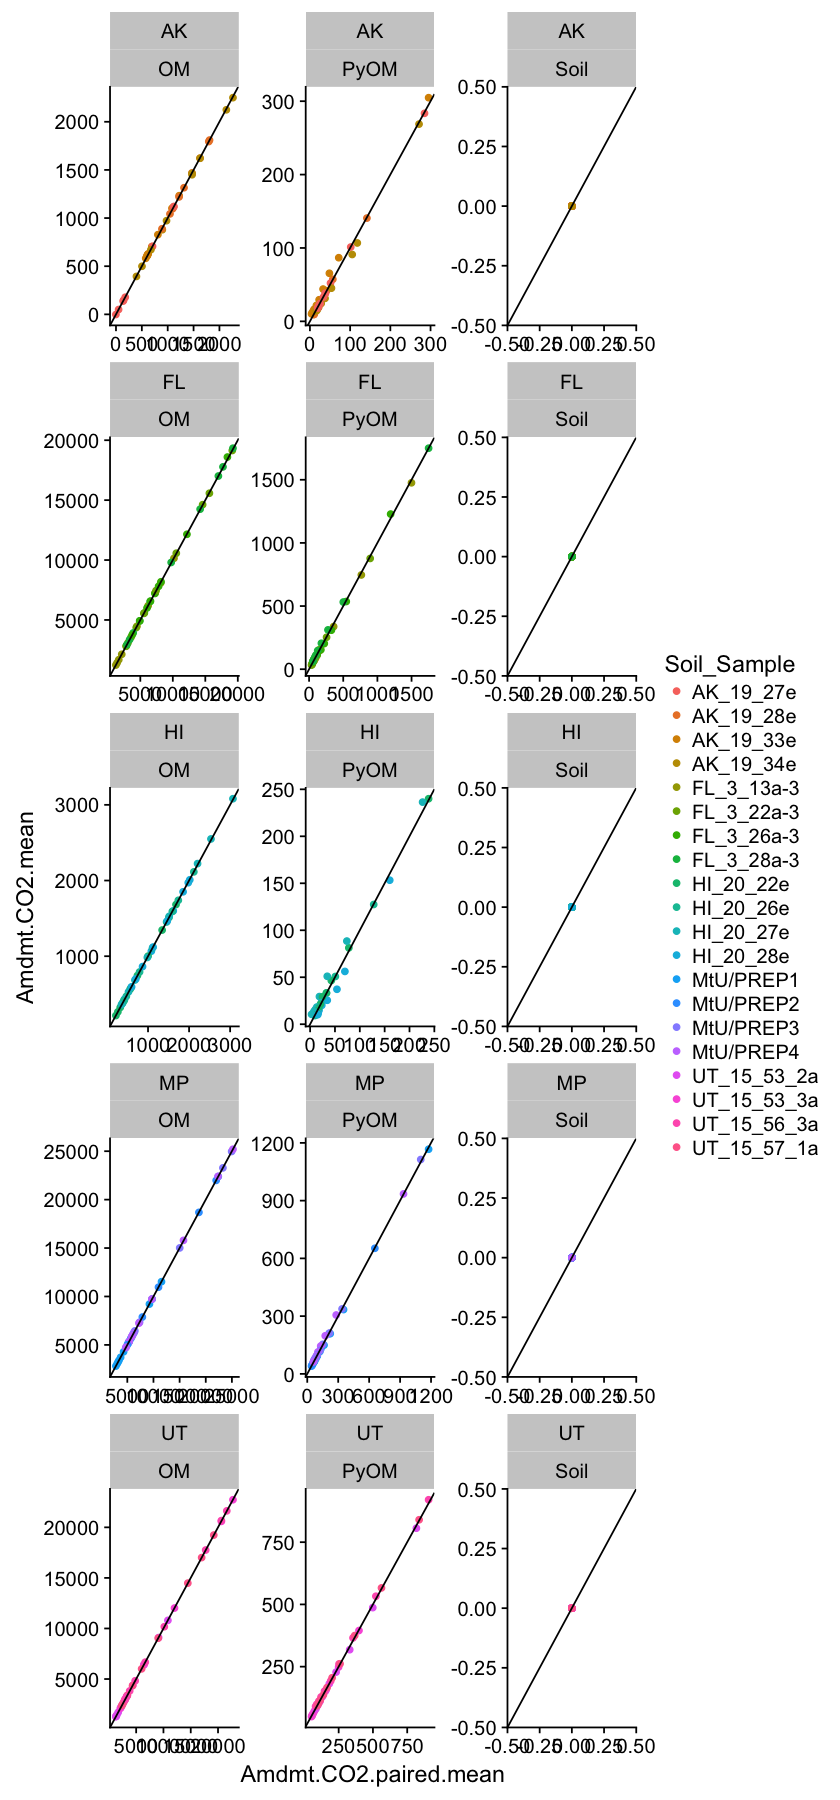

In [58]:
options(repr.plot.width=7, repr.plot.height=15)

df = short.data%>%
    filter(Soil_Sample !="Blank")

p = ggplot(df,aes(x=Amdmt.CO2.paired.mean,y=Amdmt.CO2.mean, colour=Soil_Sample))
p = p + geom_point()
p = p + facet_wrap(~Soil_Trtmt*Amdmt, scales="free",ncol=3)
p = p + geom_abline(slope=1, intercept=0)
p

# Choices make little difference for the OM treatments, or for soil respiration in general.
# More important for the PyOM treatments. Leaning toward mean and paired.

Warning message:
“Removed 60 rows containing missing values (geom_point).”

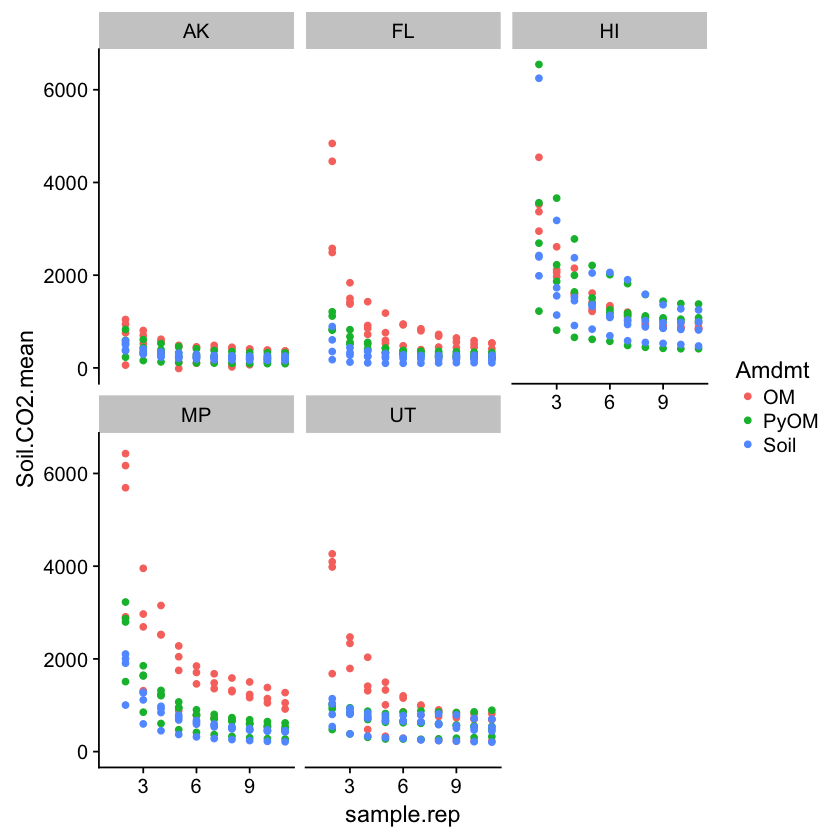

In [59]:
options(repr.plot.width=7, repr.plot.height=7)
# Should be able to plot CO2 at each timestep
df = short.data%>%
    filter(Soil_Sample !="Blank")

p = ggplot(df,aes(x=sample.rep,y=Soil.CO2.mean, colour=Amdmt))
p = p + geom_point()
p = p + facet_wrap(~Soil_Trtmt, ncol=3)
#p = p + ylim(0,1000)
p

In [60]:
# Next step is to convert to mg CO2-C
# and mgCO2-C / g soil; mgCO2-C / mg soil C
# and mg CO2-C / g amdmt; mg CO2-C / mg amdmt C

In [63]:
as.numeric(short.data$Amdmt_mg)

[1] 41 38 36 34  3  6  7  6 65 65 65 65 41 38 36 34  3  6  7  6 65 65 65 65 41
 [26] 38 36  3  6  7  6 65 65 65 65 41 38 36 34  3  6  7  6 65 65 65 65 41 38 36
 [51] 34  3  6  7  6 65 65 65 65 41 38 36 34  3  6  7  6 65 65 65 65 41 38 36  3
 [76]  6  7  6 65 65 65 65 41 38 36 34  3  6  7  6 65 65 65 65 41 38 36  3  6  7
[101]  6 65 65 65 65 41 38 36 34  3  6  7  6 65 65 65 65 41 38 36 34  3  6  7  6
[126] 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65
[151] 65 65 65 65 65 65 65 65 65 65 65 65 20 16 14 16 52 54 50 45 65 65 65 65 20
[176] 16 14 16 52 54 50 45 65 65 65 65 20 16 14 16 52 54 50 45 65 65 65 65 20 16
[201] 14 16 52 54 50 45 65 65 65 65 20 16 14 16 52 54 50 45 65 65 65 65 20 16 14
[226] 16 52 54 50 45 65 65 65 65 20 16 14 16 52 54 50 45 65 65 65 65 20 16 14 16
[251] 52 54 50 45 65 65 65 65 20 16 14 16 52 54 50 45 65 65 65 65 20 16 14 16 52
[276] 54 50 45 65 65 65 65 20 16 14 16 52 54 50 45 65 65 65 65 37 35 39 40  7  6
[301]  9  7 65 65 65 65 37 35 39 40  7  6  9  7 65 65 65 65 37 35 39 40  7  6  9
[326]  7 65 65 65 65 37 35 39 40  7  6  9  7 65 65 65 65 37 35 39 40  7  6  9  7
[351] 65 65 65 65 37 35 39 40  7  6  9  7 65 65 65 65 37 35 39 40  7  6  9  7 65
[376] 65 65 65 37 35 39 40  7  6  9  7 65 65 65 65 37 35 39 40  7  6  9  7 65 65
[401] 65 65 37 35 39 40  7  6  9  7 65 65 65 65 37 35 39 40  7  6  9  7 65 65 65
[426] 65 21 17 14 19 44 47 45 52 65 65 65 65 21 17 14 19 44 47 45 52 65 65 65 65
[451] 21 17 14 19 44 47 45 52 65 65 65 65 21 17 14 19 44 47 45 52 65 65 65 65 21
[476] 17 14 19 44 47 45 52 65 65 65 65 21 17 14 19 44 47 45 52 65 65 65 65 21 17
[501] 14 19 44 47 45 52 65 65 65 65 21 17 14 19 44 47 45 52 65 65 65 65 21 17 14
[526] 19 44 47 45 52 65 65 65 65 21 17 14 19 44 47 45 52 65 65 65 65 21 17 14 19
[551] 44 47 45 52 65 65 65 65 21 15 15 22 47 52 51 49 65 65 65 65 21 15 15 22 47
[576] 52 51 49 65 65 65 65 21 15 15 22 47 52 51 49 65 65 65 65 21 15 15 22 47 52
[601] 51 49 65 65 65 65 21 15 15 22 47 52 51 49 65 65 65 65 21 15 15 22 47 52 51
[626] 49 65 65 65 65 21 15 15 22 47 52 51 49 65 65 65 65 21 15 15 22 47 52 51 49
[651] 65 65 65 65 21 15 15 22 47 52 51 49 65 65 65 65 21 15 15 22 47 52 51 49 65
[676] 65 65 65 21 15 15 22 47 52 51 49 65 65 65 65 NA NA NA NA NA NA NA NA NA NA

In [28]:
#############################################################################################################
#  Convert co2 concentration to mass, and normalize per unit soil and per unit total initial carbon 
#############################################################################################################

# Proceeding for now with .mean not paired
short.data = data.table(short.data)
short.data[, Soil.CO2.mean.mg := Soil.CO2.mean * jar.headspace.volume * co2.density_30C * co2.carbon.frac] 
short.data[, Soil.CO2.mean.mg.per.gram.soil := Soil.CO2.mean.mg / as.numeric(paste(Soil_g))]
short.data[, Amdmt.CO2.mean.mg := Amdmt.CO2.mean * jar.headspace.volume * co2.density_30C * co2.carbon.frac] 
short.data[, Amdmt.CO2.mean.mg.per.mg.amdmt := Amdmt.CO2.mean.mg / as.numeric(paste(Amdmt_mg))]
#short.data[, respiredc_perunit_C := respired.co2.mg / jar_carbon]

short.data[, Soil.CO2.paired.mean.mg := Soil.CO2.paired.mean * jar.headspace.volume * co2.density_30C * co2.carbon.frac] 
short.data[, Soil.CO2.paired.mean.mg.per.gram.soil := Soil.CO2.paired.mean.mg / as.numeric(paste(Soil_g))]
short.data[, Amdmt.CO2.paired.mean.mg := Amdmt.CO2.paired.mean * jar.headspace.volume * co2.density_30C * co2.carbon.frac] 
short.data[, Amdmt.CO2.paired.mean.mg.per.mg.amdmt := Amdmt.CO2.paired.mean.mg / as.numeric(paste(Amdmt_mg))]

short.data[, Soil.CO2.mg := Soil.CO2 * jar.headspace.volume * co2.density_30C * co2.carbon.frac] 
short.data[, Soil.CO2.mg.per.gram.soil := Soil.CO2.mg / as.numeric(paste(Soil_g))]
short.data[, Amdmt.CO2.mg := Amdmt.CO2 * jar.headspace.volume * co2.density_30C * co2.carbon.frac] 
short.data[, Amdmt.CO2.mg.per.mg.amdmt := Amdmt.CO2.mg / as.numeric(paste(Amdmt_mg))]

sample.test samprep     sample.rep FRAC_DAYS_SINCE_JAN1 CO2tot    
1    4          00004,00001 1          239.4648              546.9688 
2    7          00007,00001 1          239.5088              749.3950 
3   10          00010,00001 1          239.5527              544.1527 
4   61          00061,00001 1          240.3014              614.8456 
5    5          00005,00001 1          239.4806              468.6309 
6    8          00008,00001 1          239.5234              884.5916 
7   11          00011,00001 1          239.5674              959.9214 
8   62          00062,00001 1          240.3160              944.2535 
9    3          00003,00001 1          239.4502              829.4831 
10   6          00006,00001 1          239.4941              672.5806 
11   9          00009,00001 1          239.5396              309.1870 
12  12          00012,00001 1          239.5820              753.5910 
13   4          00004,00002 2          240.4012             2508.4224 
14   7          00007,00002 2          240.4451             2199.7424 
15  10          00010,00002 2          240.4891             2638.4317 
16  61          00061,00002 2          241.2361             1631.4416 
17   5          00005,00002 2          240.4168              380.1895 
18   8          00008,00002 2          240.4598             1139.1778 
19  11          00011,00002 2          240.5039              824.7530 
20  62          00062,00002 2          241.2524              752.1843 
21   3          00003,00002 2          240.3866              390.1800 
22   6          00006,00002 2          240.4305              513.3098 
23   9          00009,00002 2          240.4760              382.4401 
24  12          00012,00002 2          240.5185              586.0771 
25   4          00004,00003 3          241.3376             1744.3356 
26   7          00007,00003 3          241.3816             1940.8290 
27  10          00010,00003 3          241.4256             1594.6345 
28   5          00005,00003 3          241.3534              221.9249 
29   8          00008,00003 3          241.3962              703.4550 
30  11          00011,00003 3          241.4402              520.5789 
⋮   ⋮           ⋮           ⋮          ⋮                    ⋮         
671 38          00038,00010 10         248.3907              602.73969
672 41          00041,00010 10         248.4363              349.18934
673 44          00044,00010 10         248.4787              626.42852
674 47          00047,00010 10         248.5241              901.09025
675 39          00039,00010 10         248.4055              514.11516
676 42          00042,00010 10         248.4492              683.52221
677 45          00045,00010 10         248.4948              217.22892
678 48          00048,00010 10         248.5387              447.46189
679 37          00037,00011 11         249.3138             1486.91010
680 40          00040,00011 11         249.3579             2633.78464
681 43          00043,00011 11         249.4003             3416.52763
682 46          00046,00011 11         249.4458             3049.70288
683 38          00038,00011 11         249.3271              544.20754
684 41          00041,00011 11         249.3726              372.43344
685 44          00044,00011 11         249.4150              607.95189
686 47          00047,00011 11         249.4604              926.98123
687 39          00039,00011 11         249.3418              506.10792
688 42          00042,00011 11         249.3857              671.86126
689 45          00045,00011 11         249.4311              209.14378
690 48          00048,00011 11         249.4751              425.22106
691 64          00064,00001  1         240.3451             1328.27348
692 64          00064,00003  3         242.2180               48.91324
693 64          00064,00004  4         243.1542               48.63372
694 64          00064,00005  5         244.0908               44.47765
695 64          00064,00006 

Warning message in eval(jsub, SDenv, parent.frame()):
“NAs introduced by coercion”

sample.test samprep     sample.rep FRAC_DAYS_SINCE_JAN1 CO2tot    
1    4          00004,00001 1          239.4648              546.9688 
2    7          00007,00001 1          239.5088              749.3950 
3   10          00010,00001 1          239.5527              544.1527 
4   61          00061,00001 1          240.3014              614.8456 
5    5          00005,00001 1          239.4806              468.6309 
6    8          00008,00001 1          239.5234              884.5916 
7   11          00011,00001 1          239.5674              959.9214 
8   62          00062,00001 1          240.3160              944.2535 
9    3          00003,00001 1          239.4502              829.4831 
10   6          00006,00001 1          239.4941              672.5806 
11   9          00009,00001 1          239.5396              309.1870 
12  12          00012,00001 1          239.5820              753.5910 
13   4          00004,00002 2          240.4012             2508.4224 
14   7          00007,00002 2          240.4451             2199.7424 
15  10          00010,00002 2          240.4891             2638.4317 
16  61          00061,00002 2          241.2361             1631.4416 
17   5          00005,00002 2          240.4168              380.1895 
18   8          00008,00002 2          240.4598             1139.1778 
19  11          00011,00002 2          240.5039              824.7530 
20  62          00062,00002 2          241.2524              752.1843 
21   3          00003,00002 2          240.3866              390.1800 
22   6          00006,00002 2          240.4305              513.3098 
23   9          00009,00002 2          240.4760              382.4401 
24  12          00012,00002 2          240.5185              586.0771 
25   4          00004,00003 3          241.3376             1744.3356 
26   7          00007,00003 3          241.3816             1940.8290 
27  10          00010,00003 3          241.4256             1594.6345 
28   5          00005,00003 3          241.3534              221.9249 
29   8          00008,00003 3          241.3962              703.4550 
30  11          00011,00003 3          241.4402              520.5789 
⋮   ⋮           ⋮           ⋮          ⋮                    ⋮         
671 38          00038,00010 10         248.3907              602.73969
672 41          00041,00010 10         248.4363              349.18934
673 44          00044,00010 10         248.4787              626.42852
674 47          00047,00010 10         248.5241              901.09025
675 39          00039,00010 10         248.4055              514.11516
676 42          00042,00010 10         248.4492              683.52221
677 45          00045,00010 10         248.4948              217.22892
678 48          00048,00010 10         248.5387              447.46189
679 37          00037,00011 11         249.3138             1486.91010
680 40          00040,00011 11         249.3579             2633.78464
681 43          00043,00011 11         249.4003             3416.52763
682 46          00046,00011 11         249.4458             3049.70288
683 38          00038,00011 11         249.3271              544.20754
684 41          00041,00011 11         249.3726              372.43344
685 44          00044,00011 11         249.4150              607.95189
686 47          00047,00011 11         249.4604              926.98123
687 39          00039,00011 11         249.3418              506.10792
688 42          00042,00011 11         249.3857              671.86126
689 45          00045,00011 11         249.4311              209.14378
690 48          00048,00011 11         249.4751              425.22106
691 64          00064,00001  1         240.3451             1328.27348
692 64          00064,00003  3         242.2180               48.91324
693 64          00064,00004  4         243.1542               48.63372
694 64          00064,00005  5         244.0908               44.47765
695 64          00064,00006 

sample.test samprep     sample.rep FRAC_DAYS_SINCE_JAN1 CO2tot    
1    4          00004,00001 1          239.4648              546.9688 
2    7          00007,00001 1          239.5088              749.3950 
3   10          00010,00001 1          239.5527              544.1527 
4   61          00061,00001 1          240.3014              614.8456 
5    5          00005,00001 1          239.4806              468.6309 
6    8          00008,00001 1          239.5234              884.5916 
7   11          00011,00001 1          239.5674              959.9214 
8   62          00062,00001 1          240.3160              944.2535 
9    3          00003,00001 1          239.4502              829.4831 
10   6          00006,00001 1          239.4941              672.5806 
11   9          00009,00001 1          239.5396              309.1870 
12  12          00012,00001 1          239.5820              753.5910 
13   4          00004,00002 2          240.4012             2508.4224 
14   7          00007,00002 2          240.4451             2199.7424 
15  10          00010,00002 2          240.4891             2638.4317 
16  61          00061,00002 2          241.2361             1631.4416 
17   5          00005,00002 2          240.4168              380.1895 
18   8          00008,00002 2          240.4598             1139.1778 
19  11          00011,00002 2          240.5039              824.7530 
20  62          00062,00002 2          241.2524              752.1843 
21   3          00003,00002 2          240.3866              390.1800 
22   6          00006,00002 2          240.4305              513.3098 
23   9          00009,00002 2          240.4760              382.4401 
24  12          00012,00002 2          240.5185              586.0771 
25   4          00004,00003 3          241.3376             1744.3356 
26   7          00007,00003 3          241.3816             1940.8290 
27  10          00010,00003 3          241.4256             1594.6345 
28   5          00005,00003 3          241.3534              221.9249 
29   8          00008,00003 3          241.3962              703.4550 
30  11          00011,00003 3          241.4402              520.5789 
⋮   ⋮           ⋮           ⋮          ⋮                    ⋮         
671 38          00038,00010 10         248.3907              602.73969
672 41          00041,00010 10         248.4363              349.18934
673 44          00044,00010 10         248.4787              626.42852
674 47          00047,00010 10         248.5241              901.09025
675 39          00039,00010 10         248.4055              514.11516
676 42          00042,00010 10         248.4492              683.52221
677 45          00045,00010 10         248.4948              217.22892
678 48          00048,00010 10         248.5387              447.46189
679 37          00037,00011 11         249.3138             1486.91010
680 40          00040,00011 11         249.3579             2633.78464
681 43          00043,00011 11         249.4003             3416.52763
682 46          00046,00011 11         249.4458             3049.70288
683 38          00038,00011 11         249.3271              544.20754
684 41          00041,00011 11         249.3726              372.43344
685 44          00044,00011 11         249.4150              607.95189
686 47          00047,00011 11         249.4604              926.98123
687 39          00039,00011 11         249.3418              506.10792
688 42          00042,00011 11         249.3857              671.86126
689 45          00045,00011 11         249.4311              209.14378
690 48          00048,00011 11         249.4751              425.22106
691 64          00064,00001  1         240.3451             1328.27348
692 64          00064,00003  3         242.2180               48.91324
693 64          00064,00004  4         243.1542               48.63372
694 64          00064,00005  5         244.0908               44.47765
695 64          00064,00006 

Warning message in eval(jsub, SDenv, parent.frame()):
“NAs introduced by coercion”

sample.test samprep     sample.rep FRAC_DAYS_SINCE_JAN1 CO2tot    
1    4          00004,00001 1          239.4648              546.9688 
2    7          00007,00001 1          239.5088              749.3950 
3   10          00010,00001 1          239.5527              544.1527 
4   61          00061,00001 1          240.3014              614.8456 
5    5          00005,00001 1          239.4806              468.6309 
6    8          00008,00001 1          239.5234              884.5916 
7   11          00011,00001 1          239.5674              959.9214 
8   62          00062,00001 1          240.3160              944.2535 
9    3          00003,00001 1          239.4502              829.4831 
10   6          00006,00001 1          239.4941              672.5806 
11   9          00009,00001 1          239.5396              309.1870 
12  12          00012,00001 1          239.5820              753.5910 
13   4          00004,00002 2          240.4012             2508.4224 
14   7          00007,00002 2          240.4451             2199.7424 
15  10          00010,00002 2          240.4891             2638.4317 
16  61          00061,00002 2          241.2361             1631.4416 
17   5          00005,00002 2          240.4168              380.1895 
18   8          00008,00002 2          240.4598             1139.1778 
19  11          00011,00002 2          240.5039              824.7530 
20  62          00062,00002 2          241.2524              752.1843 
21   3          00003,00002 2          240.3866              390.1800 
22   6          00006,00002 2          240.4305              513.3098 
23   9          00009,00002 2          240.4760              382.4401 
24  12          00012,00002 2          240.5185              586.0771 
25   4          00004,00003 3          241.3376             1744.3356 
26   7          00007,00003 3          241.3816             1940.8290 
27  10          00010,00003 3          241.4256             1594.6345 
28   5          00005,00003 3          241.3534              221.9249 
29   8          00008,00003 3          241.3962              703.4550 
30  11          00011,00003 3          241.4402              520.5789 
⋮   ⋮           ⋮           ⋮          ⋮                    ⋮         
671 38          00038,00010 10         248.3907              602.73969
672 41          00041,00010 10         248.4363              349.18934
673 44          00044,00010 10         248.4787              626.42852
674 47          00047,00010 10         248.5241              901.09025
675 39          00039,00010 10         248.4055              514.11516
676 42          00042,00010 10         248.4492              683.52221
677 45          00045,00010 10         248.4948              217.22892
678 48          00048,00010 10         248.5387              447.46189
679 37          00037,00011 11         249.3138             1486.91010
680 40          00040,00011 11         249.3579             2633.78464
681 43          00043,00011 11         249.4003             3416.52763
682 46          00046,00011 11         249.4458             3049.70288
683 38          00038,00011 11         249.3271              544.20754
684 41          00041,00011 11         249.3726              372.43344
685 44          00044,00011 11         249.4150              607.95189
686 47          00047,00011 11         249.4604              926.98123
687 39          00039,00011 11         249.3418              506.10792
688 42          00042,00011 11         249.3857              671.86126
689 45          00045,00011 11         249.4311              209.14378
690 48          00048,00011 11         249.4751              425.22106
691 64          00064,00001  1         240.3451             1328.27348
692 64          00064,00003  3         242.2180               48.91324
693 64          00064,00004  4         243.1542               48.63372
694 64          00064,00005  5         244.0908               44.47765
695 64          00064,00006 

sample.test samprep     sample.rep FRAC_DAYS_SINCE_JAN1 CO2tot    
1    4          00004,00001 1          239.4648              546.9688 
2    7          00007,00001 1          239.5088              749.3950 
3   10          00010,00001 1          239.5527              544.1527 
4   61          00061,00001 1          240.3014              614.8456 
5    5          00005,00001 1          239.4806              468.6309 
6    8          00008,00001 1          239.5234              884.5916 
7   11          00011,00001 1          239.5674              959.9214 
8   62          00062,00001 1          240.3160              944.2535 
9    3          00003,00001 1          239.4502              829.4831 
10   6          00006,00001 1          239.4941              672.5806 
11   9          00009,00001 1          239.5396              309.1870 
12  12          00012,00001 1          239.5820              753.5910 
13   4          00004,00002 2          240.4012             2508.4224 
14   7          00007,00002 2          240.4451             2199.7424 
15  10          00010,00002 2          240.4891             2638.4317 
16  61          00061,00002 2          241.2361             1631.4416 
17   5          00005,00002 2          240.4168              380.1895 
18   8          00008,00002 2          240.4598             1139.1778 
19  11          00011,00002 2          240.5039              824.7530 
20  62          00062,00002 2          241.2524              752.1843 
21   3          00003,00002 2          240.3866              390.1800 
22   6          00006,00002 2          240.4305              513.3098 
23   9          00009,00002 2          240.4760              382.4401 
24  12          00012,00002 2          240.5185              586.0771 
25   4          00004,00003 3          241.3376             1744.3356 
26   7          00007,00003 3          241.3816             1940.8290 
27  10          00010,00003 3          241.4256             1594.6345 
28   5          00005,00003 3          241.3534              221.9249 
29   8          00008,00003 3          241.3962              703.4550 
30  11          00011,00003 3          241.4402              520.5789 
⋮   ⋮           ⋮           ⋮          ⋮                    ⋮         
671 38          00038,00010 10         248.3907              602.73969
672 41          00041,00010 10         248.4363              349.18934
673 44          00044,00010 10         248.4787              626.42852
674 47          00047,00010 10         248.5241              901.09025
675 39          00039,00010 10         248.4055              514.11516
676 42          00042,00010 10         248.4492              683.52221
677 45          00045,00010 10         248.4948              217.22892
678 48          00048,00010 10         248.5387              447.46189
679 37          00037,00011 11         249.3138             1486.91010
680 40          00040,00011 11         249.3579             2633.78464
681 43          00043,00011 11         249.4003             3416.52763
682 46          00046,00011 11         249.4458             3049.70288
683 38          00038,00011 11         249.3271              544.20754
684 41          00041,00011 11         249.3726              372.43344
685 44          00044,00011 11         249.4150              607.95189
686 47          00047,00011 11         249.4604              926.98123
687 39          00039,00011 11         249.3418              506.10792
688 42          00042,00011 11         249.3857              671.86126
689 45          00045,00011 11         249.4311              209.14378
690 48          00048,00011 11         249.4751              425.22106
691 64          00064,00001  1         240.3451             1328.27348
692 64          00064,00003  3         242.2180               48.91324
693 64          00064,00004  4         243.1542               48.63372
694 64          00064,00005  5         244.0908               44.47765
695 64          00064,00006 

Warning message in eval(jsub, SDenv, parent.frame()):
“NAs introduced by coercion”

sample.test samprep     sample.rep FRAC_DAYS_SINCE_JAN1 CO2tot    
1    4          00004,00001 1          239.4648              546.9688 
2    7          00007,00001 1          239.5088              749.3950 
3   10          00010,00001 1          239.5527              544.1527 
4   61          00061,00001 1          240.3014              614.8456 
5    5          00005,00001 1          239.4806              468.6309 
6    8          00008,00001 1          239.5234              884.5916 
7   11          00011,00001 1          239.5674              959.9214 
8   62          00062,00001 1          240.3160              944.2535 
9    3          00003,00001 1          239.4502              829.4831 
10   6          00006,00001 1          239.4941              672.5806 
11   9          00009,00001 1          239.5396              309.1870 
12  12          00012,00001 1          239.5820              753.5910 
13   4          00004,00002 2          240.4012             2508.4224 
14   7          00007,00002 2          240.4451             2199.7424 
15  10          00010,00002 2          240.4891             2638.4317 
16  61          00061,00002 2          241.2361             1631.4416 
17   5          00005,00002 2          240.4168              380.1895 
18   8          00008,00002 2          240.4598             1139.1778 
19  11          00011,00002 2          240.5039              824.7530 
20  62          00062,00002 2          241.2524              752.1843 
21   3          00003,00002 2          240.3866              390.1800 
22   6          00006,00002 2          240.4305              513.3098 
23   9          00009,00002 2          240.4760              382.4401 
24  12          00012,00002 2          240.5185              586.0771 
25   4          00004,00003 3          241.3376             1744.3356 
26   7          00007,00003 3          241.3816             1940.8290 
27  10          00010,00003 3          241.4256             1594.6345 
28   5          00005,00003 3          241.3534              221.9249 
29   8          00008,00003 3          241.3962              703.4550 
30  11          00011,00003 3          241.4402              520.5789 
⋮   ⋮           ⋮           ⋮          ⋮                    ⋮         
671 38          00038,00010 10         248.3907              602.73969
672 41          00041,00010 10         248.4363              349.18934
673 44          00044,00010 10         248.4787              626.42852
674 47          00047,00010 10         248.5241              901.09025
675 39          00039,00010 10         248.4055              514.11516
676 42          00042,00010 10         248.4492              683.52221
677 45          00045,00010 10         248.4948              217.22892
678 48          00048,00010 10         248.5387              447.46189
679 37          00037,00011 11         249.3138             1486.91010
680 40          00040,00011 11         249.3579             2633.78464
681 43          00043,00011 11         249.4003             3416.52763
682 46          00046,00011 11         249.4458             3049.70288
683 38          00038,00011 11         249.3271              544.20754
684 41          00041,00011 11         249.3726              372.43344
685 44          00044,00011 11         249.4150              607.95189
686 47          00047,00011 11         249.4604              926.98123
687 39          00039,00011 11         249.3418              506.10792
688 42          00042,00011 11         249.3857              671.86126
689 45          00045,00011 11         249.4311              209.14378
690 48          00048,00011 11         249.4751              425.22106
691 64          00064,00001  1         240.3451             1328.27348
692 64          00064,00003  3         242.2180               48.91324
693 64          00064,00004  4         243.1542               48.63372
694 64          00064,00005  5         244.0908               44.47765
695 64          00064,00006 

sample.test samprep     sample.rep FRAC_DAYS_SINCE_JAN1 CO2tot    
1    4          00004,00001 1          239.4648              546.9688 
2    7          00007,00001 1          239.5088              749.3950 
3   10          00010,00001 1          239.5527              544.1527 
4   61          00061,00001 1          240.3014              614.8456 
5    5          00005,00001 1          239.4806              468.6309 
6    8          00008,00001 1          239.5234              884.5916 
7   11          00011,00001 1          239.5674              959.9214 
8   62          00062,00001 1          240.3160              944.2535 
9    3          00003,00001 1          239.4502              829.4831 
10   6          00006,00001 1          239.4941              672.5806 
11   9          00009,00001 1          239.5396              309.1870 
12  12          00012,00001 1          239.5820              753.5910 
13   4          00004,00002 2          240.4012             2508.4224 
14   7          00007,00002 2          240.4451             2199.7424 
15  10          00010,00002 2          240.4891             2638.4317 
16  61          00061,00002 2          241.2361             1631.4416 
17   5          00005,00002 2          240.4168              380.1895 
18   8          00008,00002 2          240.4598             1139.1778 
19  11          00011,00002 2          240.5039              824.7530 
20  62          00062,00002 2          241.2524              752.1843 
21   3          00003,00002 2          240.3866              390.1800 
22   6          00006,00002 2          240.4305              513.3098 
23   9          00009,00002 2          240.4760              382.4401 
24  12          00012,00002 2          240.5185              586.0771 
25   4          00004,00003 3          241.3376             1744.3356 
26   7          00007,00003 3          241.3816             1940.8290 
27  10          00010,00003 3          241.4256             1594.6345 
28   5          00005,00003 3          241.3534              221.9249 
29   8          00008,00003 3          241.3962              703.4550 
30  11          00011,00003 3          241.4402              520.5789 
⋮   ⋮           ⋮           ⋮          ⋮                    ⋮         
671 38          00038,00010 10         248.3907              602.73969
672 41          00041,00010 10         248.4363              349.18934
673 44          00044,00010 10         248.4787              626.42852
674 47          00047,00010 10         248.5241              901.09025
675 39          00039,00010 10         248.4055              514.11516
676 42          00042,00010 10         248.4492              683.52221
677 45          00045,00010 10         248.4948              217.22892
678 48          00048,00010 10         248.5387              447.46189
679 37          00037,00011 11         249.3138             1486.91010
680 40          00040,00011 11         249.3579             2633.78464
681 43          00043,00011 11         249.4003             3416.52763
682 46          00046,00011 11         249.4458             3049.70288
683 38          00038,00011 11         249.3271              544.20754
684 41          00041,00011 11         249.3726              372.43344
685 44          00044,00011 11         249.4150              607.95189
686 47          00047,00011 11         249.4604              926.98123
687 39          00039,00011 11         249.3418              506.10792
688 42          00042,00011 11         249.3857              671.86126
689 45          00045,00011 11         249.4311              209.14378
690 48          00048,00011 11         249.4751              425.22106
691 64          00064,00001  1         240.3451             1328.27348
692 64          00064,00003  3         242.2180               48.91324
693 64          00064,00004  4         243.1542               48.63372
694 64          00064,00005  5         244.0908               44.47765
695 64          00064,00006 

Warning message in eval(jsub, SDenv, parent.frame()):
“NAs introduced by coercion”

sample.test samprep     sample.rep FRAC_DAYS_SINCE_JAN1 CO2tot    
1    4          00004,00001 1          239.4648              546.9688 
2    7          00007,00001 1          239.5088              749.3950 
3   10          00010,00001 1          239.5527              544.1527 
4   61          00061,00001 1          240.3014              614.8456 
5    5          00005,00001 1          239.4806              468.6309 
6    8          00008,00001 1          239.5234              884.5916 
7   11          00011,00001 1          239.5674              959.9214 
8   62          00062,00001 1          240.3160              944.2535 
9    3          00003,00001 1          239.4502              829.4831 
10   6          00006,00001 1          239.4941              672.5806 
11   9          00009,00001 1          239.5396              309.1870 
12  12          00012,00001 1          239.5820              753.5910 
13   4          00004,00002 2          240.4012             2508.4224 
14   7          00007,00002 2          240.4451             2199.7424 
15  10          00010,00002 2          240.4891             2638.4317 
16  61          00061,00002 2          241.2361             1631.4416 
17   5          00005,00002 2          240.4168              380.1895 
18   8          00008,00002 2          240.4598             1139.1778 
19  11          00011,00002 2          240.5039              824.7530 
20  62          00062,00002 2          241.2524              752.1843 
21   3          00003,00002 2          240.3866              390.1800 
22   6          00006,00002 2          240.4305              513.3098 
23   9          00009,00002 2          240.4760              382.4401 
24  12          00012,00002 2          240.5185              586.0771 
25   4          00004,00003 3          241.3376             1744.3356 
26   7          00007,00003 3          241.3816             1940.8290 
27  10          00010,00003 3          241.4256             1594.6345 
28   5          00005,00003 3          241.3534              221.9249 
29   8          00008,00003 3          241.3962              703.4550 
30  11          00011,00003 3          241.4402              520.5789 
⋮   ⋮           ⋮           ⋮          ⋮                    ⋮         
671 38          00038,00010 10         248.3907              602.73969
672 41          00041,00010 10         248.4363              349.18934
673 44          00044,00010 10         248.4787              626.42852
674 47          00047,00010 10         248.5241              901.09025
675 39          00039,00010 10         248.4055              514.11516
676 42          00042,00010 10         248.4492              683.52221
677 45          00045,00010 10         248.4948              217.22892
678 48          00048,00010 10         248.5387              447.46189
679 37          00037,00011 11         249.3138             1486.91010
680 40          00040,00011 11         249.3579             2633.78464
681 43          00043,00011 11         249.4003             3416.52763
682 46          00046,00011 11         249.4458             3049.70288
683 38          00038,00011 11         249.3271              544.20754
684 41          00041,00011 11         249.3726              372.43344
685 44          00044,00011 11         249.4150              607.95189
686 47          00047,00011 11         249.4604              926.98123
687 39          00039,00011 11         249.3418              506.10792
688 42          00042,00011 11         249.3857              671.86126
689 45          00045,00011 11         249.4311              209.14378
690 48          00048,00011 11         249.4751              425.22106
691 64          00064,00001  1         240.3451             1328.27348
692 64          00064,00003  3         242.2180               48.91324
693 64          00064,00004  4         243.1542               48.63372
694 64          00064,00005  5         244.0908               44.47765
695 64          00064,00006 

sample.test samprep     sample.rep FRAC_DAYS_SINCE_JAN1 CO2tot    
1    4          00004,00001 1          239.4648              546.9688 
2    7          00007,00001 1          239.5088              749.3950 
3   10          00010,00001 1          239.5527              544.1527 
4   61          00061,00001 1          240.3014              614.8456 
5    5          00005,00001 1          239.4806              468.6309 
6    8          00008,00001 1          239.5234              884.5916 
7   11          00011,00001 1          239.5674              959.9214 
8   62          00062,00001 1          240.3160              944.2535 
9    3          00003,00001 1          239.4502              829.4831 
10   6          00006,00001 1          239.4941              672.5806 
11   9          00009,00001 1          239.5396              309.1870 
12  12          00012,00001 1          239.5820              753.5910 
13   4          00004,00002 2          240.4012             2508.4224 
14   7          00007,00002 2          240.4451             2199.7424 
15  10          00010,00002 2          240.4891             2638.4317 
16  61          00061,00002 2          241.2361             1631.4416 
17   5          00005,00002 2          240.4168              380.1895 
18   8          00008,00002 2          240.4598             1139.1778 
19  11          00011,00002 2          240.5039              824.7530 
20  62          00062,00002 2          241.2524              752.1843 
21   3          00003,00002 2          240.3866              390.1800 
22   6          00006,00002 2          240.4305              513.3098 
23   9          00009,00002 2          240.4760              382.4401 
24  12          00012,00002 2          240.5185              586.0771 
25   4          00004,00003 3          241.3376             1744.3356 
26   7          00007,00003 3          241.3816             1940.8290 
27  10          00010,00003 3          241.4256             1594.6345 
28   5          00005,00003 3          241.3534              221.9249 
29   8          00008,00003 3          241.3962              703.4550 
30  11          00011,00003 3          241.4402              520.5789 
⋮   ⋮           ⋮           ⋮          ⋮                    ⋮         
671 38          00038,00010 10         248.3907              602.73969
672 41          00041,00010 10         248.4363              349.18934
673 44          00044,00010 10         248.4787              626.42852
674 47          00047,00010 10         248.5241              901.09025
675 39          00039,00010 10         248.4055              514.11516
676 42          00042,00010 10         248.4492              683.52221
677 45          00045,00010 10         248.4948              217.22892
678 48          00048,00010 10         248.5387              447.46189
679 37          00037,00011 11         249.3138             1486.91010
680 40          00040,00011 11         249.3579             2633.78464
681 43          00043,00011 11         249.4003             3416.52763
682 46          00046,00011 11         249.4458             3049.70288
683 38          00038,00011 11         249.3271              544.20754
684 41          00041,00011 11         249.3726              372.43344
685 44          00044,00011 11         249.4150              607.95189
686 47          00047,00011 11         249.4604              926.98123
687 39          00039,00011 11         249.3418              506.10792
688 42          00042,00011 11         249.3857              671.86126
689 45          00045,00011 11         249.4311              209.14378
690 48          00048,00011 11         249.4751              425.22106
691 64          00064,00001  1         240.3451             1328.27348
692 64          00064,00003  3         242.2180               48.91324
693 64          00064,00004  4         243.1542               48.63372
694 64          00064,00005  5         244.0908               44.47765
695 64          00064,00006 

Warning message in eval(jsub, SDenv, parent.frame()):
“NAs introduced by coercion”

sample.test samprep     sample.rep FRAC_DAYS_SINCE_JAN1 CO2tot    
1    4          00004,00001 1          239.4648              546.9688 
2    7          00007,00001 1          239.5088              749.3950 
3   10          00010,00001 1          239.5527              544.1527 
4   61          00061,00001 1          240.3014              614.8456 
5    5          00005,00001 1          239.4806              468.6309 
6    8          00008,00001 1          239.5234              884.5916 
7   11          00011,00001 1          239.5674              959.9214 
8   62          00062,00001 1          240.3160              944.2535 
9    3          00003,00001 1          239.4502              829.4831 
10   6          00006,00001 1          239.4941              672.5806 
11   9          00009,00001 1          239.5396              309.1870 
12  12          00012,00001 1          239.5820              753.5910 
13   4          00004,00002 2          240.4012             2508.4224 
14   7          00007,00002 2          240.4451             2199.7424 
15  10          00010,00002 2          240.4891             2638.4317 
16  61          00061,00002 2          241.2361             1631.4416 
17   5          00005,00002 2          240.4168              380.1895 
18   8          00008,00002 2          240.4598             1139.1778 
19  11          00011,00002 2          240.5039              824.7530 
20  62          00062,00002 2          241.2524              752.1843 
21   3          00003,00002 2          240.3866              390.1800 
22   6          00006,00002 2          240.4305              513.3098 
23   9          00009,00002 2          240.4760              382.4401 
24  12          00012,00002 2          240.5185              586.0771 
25   4          00004,00003 3          241.3376             1744.3356 
26   7          00007,00003 3          241.3816             1940.8290 
27  10          00010,00003 3          241.4256             1594.6345 
28   5          00005,00003 3          241.3534              221.9249 
29   8          00008,00003 3          241.3962              703.4550 
30  11          00011,00003 3          241.4402              520.5789 
⋮   ⋮           ⋮           ⋮          ⋮                    ⋮         
671 38          00038,00010 10         248.3907              602.73969
672 41          00041,00010 10         248.4363              349.18934
673 44          00044,00010 10         248.4787              626.42852
674 47          00047,00010 10         248.5241              901.09025
675 39          00039,00010 10         248.4055              514.11516
676 42          00042,00010 10         248.4492              683.52221
677 45          00045,00010 10         248.4948              217.22892
678 48          00048,00010 10         248.5387              447.46189
679 37          00037,00011 11         249.3138             1486.91010
680 40          00040,00011 11         249.3579             2633.78464
681 43          00043,00011 11         249.4003             3416.52763
682 46          00046,00011 11         249.4458             3049.70288
683 38          00038,00011 11         249.3271              544.20754
684 41          00041,00011 11         249.3726              372.43344
685 44          00044,00011 11         249.4150              607.95189
686 47          00047,00011 11         249.4604              926.98123
687 39          00039,00011 11         249.3418              506.10792
688 42          00042,00011 11         249.3857              671.86126
689 45          00045,00011 11         249.4311              209.14378
690 48          00048,00011 11         249.4751              425.22106
691 64          00064,00001  1         240.3451             1328.27348
692 64          00064,00003  3         242.2180               48.91324
693 64          00064,00004  4         243.1542               48.63372
694 64          00064,00005  5         244.0908               44.47765
695 64          00064,00006 

sample.test samprep     sample.rep FRAC_DAYS_SINCE_JAN1 CO2tot    
1    4          00004,00001 1          239.4648              546.9688 
2    7          00007,00001 1          239.5088              749.3950 
3   10          00010,00001 1          239.5527              544.1527 
4   61          00061,00001 1          240.3014              614.8456 
5    5          00005,00001 1          239.4806              468.6309 
6    8          00008,00001 1          239.5234              884.5916 
7   11          00011,00001 1          239.5674              959.9214 
8   62          00062,00001 1          240.3160              944.2535 
9    3          00003,00001 1          239.4502              829.4831 
10   6          00006,00001 1          239.4941              672.5806 
11   9          00009,00001 1          239.5396              309.1870 
12  12          00012,00001 1          239.5820              753.5910 
13   4          00004,00002 2          240.4012             2508.4224 
14   7          00007,00002 2          240.4451             2199.7424 
15  10          00010,00002 2          240.4891             2638.4317 
16  61          00061,00002 2          241.2361             1631.4416 
17   5          00005,00002 2          240.4168              380.1895 
18   8          00008,00002 2          240.4598             1139.1778 
19  11          00011,00002 2          240.5039              824.7530 
20  62          00062,00002 2          241.2524              752.1843 
21   3          00003,00002 2          240.3866              390.1800 
22   6          00006,00002 2          240.4305              513.3098 
23   9          00009,00002 2          240.4760              382.4401 
24  12          00012,00002 2          240.5185              586.0771 
25   4          00004,00003 3          241.3376             1744.3356 
26   7          00007,00003 3          241.3816             1940.8290 
27  10          00010,00003 3          241.4256             1594.6345 
28   5          00005,00003 3          241.3534              221.9249 
29   8          00008,00003 3          241.3962              703.4550 
30  11          00011,00003 3          241.4402              520.5789 
⋮   ⋮           ⋮           ⋮          ⋮                    ⋮         
671 38          00038,00010 10         248.3907              602.73969
672 41          00041,00010 10         248.4363              349.18934
673 44          00044,00010 10         248.4787              626.42852
674 47          00047,00010 10         248.5241              901.09025
675 39          00039,00010 10         248.4055              514.11516
676 42          00042,00010 10         248.4492              683.52221
677 45          00045,00010 10         248.4948              217.22892
678 48          00048,00010 10         248.5387              447.46189
679 37          00037,00011 11         249.3138             1486.91010
680 40          00040,00011 11         249.3579             2633.78464
681 43          00043,00011 11         249.4003             3416.52763
682 46          00046,00011 11         249.4458             3049.70288
683 38          00038,00011 11         249.3271              544.20754
684 41          00041,00011 11         249.3726              372.43344
685 44          00044,00011 11         249.4150              607.95189
686 47          00047,00011 11         249.4604              926.98123
687 39          00039,00011 11         249.3418              506.10792
688 42          00042,00011 11         249.3857              671.86126
689 45          00045,00011 11         249.4311              209.14378
690 48          00048,00011 11         249.4751              425.22106
691 64          00064,00001  1         240.3451             1328.27348
692 64          00064,00003  3         242.2180               48.91324
693 64          00064,00004  4         243.1542               48.63372
694 64          00064,00005  5         244.0908               44.47765
695 64          00064,00006 

Warning message in eval(jsub, SDenv, parent.frame()):
“NAs introduced by coercion”

sample.test samprep     sample.rep FRAC_DAYS_SINCE_JAN1 CO2tot    
1    4          00004,00001 1          239.4648              546.9688 
2    7          00007,00001 1          239.5088              749.3950 
3   10          00010,00001 1          239.5527              544.1527 
4   61          00061,00001 1          240.3014              614.8456 
5    5          00005,00001 1          239.4806              468.6309 
6    8          00008,00001 1          239.5234              884.5916 
7   11          00011,00001 1          239.5674              959.9214 
8   62          00062,00001 1          240.3160              944.2535 
9    3          00003,00001 1          239.4502              829.4831 
10   6          00006,00001 1          239.4941              672.5806 
11   9          00009,00001 1          239.5396              309.1870 
12  12          00012,00001 1          239.5820              753.5910 
13   4          00004,00002 2          240.4012             2508.4224 
14   7          00007,00002 2          240.4451             2199.7424 
15  10          00010,00002 2          240.4891             2638.4317 
16  61          00061,00002 2          241.2361             1631.4416 
17   5          00005,00002 2          240.4168              380.1895 
18   8          00008,00002 2          240.4598             1139.1778 
19  11          00011,00002 2          240.5039              824.7530 
20  62          00062,00002 2          241.2524              752.1843 
21   3          00003,00002 2          240.3866              390.1800 
22   6          00006,00002 2          240.4305              513.3098 
23   9          00009,00002 2          240.4760              382.4401 
24  12          00012,00002 2          240.5185              586.0771 
25   4          00004,00003 3          241.3376             1744.3356 
26   7          00007,00003 3          241.3816             1940.8290 
27  10          00010,00003 3          241.4256             1594.6345 
28   5          00005,00003 3          241.3534              221.9249 
29   8          00008,00003 3          241.3962              703.4550 
30  11          00011,00003 3          241.4402              520.5789 
⋮   ⋮           ⋮           ⋮          ⋮                    ⋮         
671 38          00038,00010 10         248.3907              602.73969
672 41          00041,00010 10         248.4363              349.18934
673 44          00044,00010 10         248.4787              626.42852
674 47          00047,00010 10         248.5241              901.09025
675 39          00039,00010 10         248.4055              514.11516
676 42          00042,00010 10         248.4492              683.52221
677 45          00045,00010 10         248.4948              217.22892
678 48          00048,00010 10         248.5387              447.46189
679 37          00037,00011 11         249.3138             1486.91010
680 40          00040,00011 11         249.3579             2633.78464
681 43          00043,00011 11         249.4003             3416.52763
682 46          00046,00011 11         249.4458             3049.70288
683 38          00038,00011 11         249.3271              544.20754
684 41          00041,00011 11         249.3726              372.43344
685 44          00044,00011 11         249.4150              607.95189
686 47          00047,00011 11         249.4604              926.98123
687 39          00039,00011 11         249.3418              506.10792
688 42          00042,00011 11         249.3857              671.86126
689 45          00045,00011 11         249.4311              209.14378
690 48          00048,00011 11         249.4751              425.22106
691 64          00064,00001  1         240.3451             1328.27348
692 64          00064,00003  3         242.2180               48.91324
693 64          00064,00004  4         243.1542               48.63372
694 64          00064,00005  5         244.0908               44.47765
695 64          00064,00006 

Warning message:
“Removed 60 rows containing missing values (geom_point).”

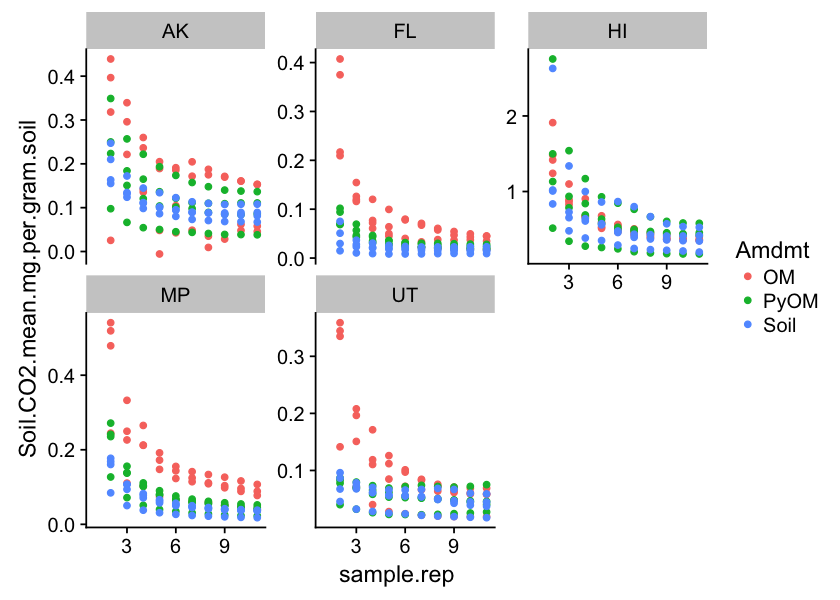

In [29]:
options(repr.plot.width=7, repr.plot.height=5)
# Should be able to plot CO2 at each timestep

df = short.data%>%
    filter(Soil_Sample !="Blank")

p = ggplot(df,aes(x=sample.rep,y=Soil.CO2.mean.mg.per.gram.soil, colour=Amdmt))
p = p + geom_point()
p = p + facet_wrap(~Soil_Trtmt, scales="free_y",ncol=3)
#p = p + ylim(0,1000)
p

In [30]:
short.data[, Soil.CO2.mean.mg.per.gram.soil.cum := as.numeric(NA)]
short.data[!is.na(Soil.CO2.mean.mg.per.gram.soil), Soil.CO2.mean.mg.per.gram.soil.cum := cumsum(Soil.CO2.mean.mg.per.gram.soil), by=(sample.test)]
#short.data[,Proportion_remaining_SoilC:= SoilC/(soil_carbon-SoilC.cum)]
short.data[, Amdmt.CO2.mean.mg.per.mg.amdmt.cum := as.numeric(NA)]
short.data[!is.na(Amdmt.CO2.mean.mg.per.mg.amdmt), Amdmt.CO2.mean.mg.per.mg.amdmt.cum := cumsum(Amdmt.CO2.mean.mg.per.mg.amdmt), by=(sample.test)]

short.data[, Soil.CO2.paired.mean.mg.per.gram.soil.cum := as.numeric(NA)]
short.data[!is.na(Soil.CO2.paired.mean.mg.per.gram.soil), Soil.CO2.paired.mean.mg.per.gram.soil.cum := cumsum(Soil.CO2.paired.mean.mg.per.gram.soil), by=(sample.test)]
short.data[, Amdmt.CO2.paired.mean.mg.per.mg.amdmt.cum := as.numeric(NA)]
short.data[!is.na(Amdmt.CO2.paired.mean.mg.per.mg.amdmt), Amdmt.CO2.paired.mean.mg.per.mg.amdmt.cum := cumsum(Amdmt.CO2.paired.mean.mg.per.mg.amdmt), by=(sample.test)]

short.data[, Soil.CO2.mg.per.gram.soil.cum := as.numeric(NA)]
short.data[!is.na(Soil.CO2.mg.per.gram.soil), Soil.CO2.mg.per.gram.soil.cum := cumsum(Soil.CO2.mg.per.gram.soil), by=(sample.test)]
short.data[, Amdmt.CO2.mg.per.mg.amdmt.cum := as.numeric(NA)]
short.data[!is.na(Amdmt.CO2.mg.per.mg.amdmt), Amdmt.CO2.mg.per.mg.amdmt.cum := cumsum(Amdmt.CO2.mg.per.mg.amdmt), by=(sample.test)]

sample.test samprep     sample.rep FRAC_DAYS_SINCE_JAN1 CO2tot    
1    4          00004,00001 1          239.4648              546.9688 
2    7          00007,00001 1          239.5088              749.3950 
3   10          00010,00001 1          239.5527              544.1527 
4   61          00061,00001 1          240.3014              614.8456 
5    5          00005,00001 1          239.4806              468.6309 
6    8          00008,00001 1          239.5234              884.5916 
7   11          00011,00001 1          239.5674              959.9214 
8   62          00062,00001 1          240.3160              944.2535 
9    3          00003,00001 1          239.4502              829.4831 
10   6          00006,00001 1          239.4941              672.5806 
11   9          00009,00001 1          239.5396              309.1870 
12  12          00012,00001 1          239.5820              753.5910 
13   4          00004,00002 2          240.4012             2508.4224 
14   7          00007,00002 2          240.4451             2199.7424 
15  10          00010,00002 2          240.4891             2638.4317 
16  61          00061,00002 2          241.2361             1631.4416 
17   5          00005,00002 2          240.4168              380.1895 
18   8          00008,00002 2          240.4598             1139.1778 
19  11          00011,00002 2          240.5039              824.7530 
20  62          00062,00002 2          241.2524              752.1843 
21   3          00003,00002 2          240.3866              390.1800 
22   6          00006,00002 2          240.4305              513.3098 
23   9          00009,00002 2          240.4760              382.4401 
24  12          00012,00002 2          240.5185              586.0771 
25   4          00004,00003 3          241.3376             1744.3356 
26   7          00007,00003 3          241.3816             1940.8290 
27  10          00010,00003 3          241.4256             1594.6345 
28   5          00005,00003 3          241.3534              221.9249 
29   8          00008,00003 3          241.3962              703.4550 
30  11          00011,00003 3          241.4402              520.5789 
⋮   ⋮           ⋮           ⋮          ⋮                    ⋮         
671 38          00038,00010 10         248.3907              602.73969
672 41          00041,00010 10         248.4363              349.18934
673 44          00044,00010 10         248.4787              626.42852
674 47          00047,00010 10         248.5241              901.09025
675 39          00039,00010 10         248.4055              514.11516
676 42          00042,00010 10         248.4492              683.52221
677 45          00045,00010 10         248.4948              217.22892
678 48          00048,00010 10         248.5387              447.46189
679 37          00037,00011 11         249.3138             1486.91010
680 40          00040,00011 11         249.3579             2633.78464
681 43          00043,00011 11         249.4003             3416.52763
682 46          00046,00011 11         249.4458             3049.70288
683 38          00038,00011 11         249.3271              544.20754
684 41          00041,00011 11         249.3726              372.43344
685 44          00044,00011 11         249.4150              607.95189
686 47          00047,00011 11         249.4604              926.98123
687 39          00039,00011 11         249.3418              506.10792
688 42          00042,00011 11         249.3857              671.86126
689 45          00045,00011 11         249.4311              209.14378
690 48          00048,00011 11         249.4751              425.22106
691 64          00064,00001  1         240.3451             1328.27348
692 64          00064,00003  3         242.2180               48.91324
693 64          00064,00004  4         243.1542               48.63372
694 64          00064,00005  5         244.0908               44.47765
695 64          00064,00006 

sample.test samprep     sample.rep FRAC_DAYS_SINCE_JAN1 CO2tot    
1    4          00004,00001 1          239.4648              546.9688 
2    7          00007,00001 1          239.5088              749.3950 
3   10          00010,00001 1          239.5527              544.1527 
4   61          00061,00001 1          240.3014              614.8456 
5    5          00005,00001 1          239.4806              468.6309 
6    8          00008,00001 1          239.5234              884.5916 
7   11          00011,00001 1          239.5674              959.9214 
8   62          00062,00001 1          240.3160              944.2535 
9    3          00003,00001 1          239.4502              829.4831 
10   6          00006,00001 1          239.4941              672.5806 
11   9          00009,00001 1          239.5396              309.1870 
12  12          00012,00001 1          239.5820              753.5910 
13   4          00004,00002 2          240.4012             2508.4224 
14   7          00007,00002 2          240.4451             2199.7424 
15  10          00010,00002 2          240.4891             2638.4317 
16  61          00061,00002 2          241.2361             1631.4416 
17   5          00005,00002 2          240.4168              380.1895 
18   8          00008,00002 2          240.4598             1139.1778 
19  11          00011,00002 2          240.5039              824.7530 
20  62          00062,00002 2          241.2524              752.1843 
21   3          00003,00002 2          240.3866              390.1800 
22   6          00006,00002 2          240.4305              513.3098 
23   9          00009,00002 2          240.4760              382.4401 
24  12          00012,00002 2          240.5185              586.0771 
25   4          00004,00003 3          241.3376             1744.3356 
26   7          00007,00003 3          241.3816             1940.8290 
27  10          00010,00003 3          241.4256             1594.6345 
28   5          00005,00003 3          241.3534              221.9249 
29   8          00008,00003 3          241.3962              703.4550 
30  11          00011,00003 3          241.4402              520.5789 
⋮   ⋮           ⋮           ⋮          ⋮                    ⋮         
671 38          00038,00010 10         248.3907              602.73969
672 41          00041,00010 10         248.4363              349.18934
673 44          00044,00010 10         248.4787              626.42852
674 47          00047,00010 10         248.5241              901.09025
675 39          00039,00010 10         248.4055              514.11516
676 42          00042,00010 10         248.4492              683.52221
677 45          00045,00010 10         248.4948              217.22892
678 48          00048,00010 10         248.5387              447.46189
679 37          00037,00011 11         249.3138             1486.91010
680 40          00040,00011 11         249.3579             2633.78464
681 43          00043,00011 11         249.4003             3416.52763
682 46          00046,00011 11         249.4458             3049.70288
683 38          00038,00011 11         249.3271              544.20754
684 41          00041,00011 11         249.3726              372.43344
685 44          00044,00011 11         249.4150              607.95189
686 47          00047,00011 11         249.4604              926.98123
687 39          00039,00011 11         249.3418              506.10792
688 42          00042,00011 11         249.3857              671.86126
689 45          00045,00011 11         249.4311              209.14378
690 48          00048,00011 11         249.4751              425.22106
691 64          00064,00001  1         240.3451             1328.27348
692 64          00064,00003  3         242.2180               48.91324
693 64          00064,00004  4         243.1542               48.63372
694 64          00064,00005  5         244.0908               44.47765
695 64          00064,00006 

sample.test samprep     sample.rep FRAC_DAYS_SINCE_JAN1 CO2tot    
1    4          00004,00001 1          239.4648              546.9688 
2    7          00007,00001 1          239.5088              749.3950 
3   10          00010,00001 1          239.5527              544.1527 
4   61          00061,00001 1          240.3014              614.8456 
5    5          00005,00001 1          239.4806              468.6309 
6    8          00008,00001 1          239.5234              884.5916 
7   11          00011,00001 1          239.5674              959.9214 
8   62          00062,00001 1          240.3160              944.2535 
9    3          00003,00001 1          239.4502              829.4831 
10   6          00006,00001 1          239.4941              672.5806 
11   9          00009,00001 1          239.5396              309.1870 
12  12          00012,00001 1          239.5820              753.5910 
13   4          00004,00002 2          240.4012             2508.4224 
14   7          00007,00002 2          240.4451             2199.7424 
15  10          00010,00002 2          240.4891             2638.4317 
16  61          00061,00002 2          241.2361             1631.4416 
17   5          00005,00002 2          240.4168              380.1895 
18   8          00008,00002 2          240.4598             1139.1778 
19  11          00011,00002 2          240.5039              824.7530 
20  62          00062,00002 2          241.2524              752.1843 
21   3          00003,00002 2          240.3866              390.1800 
22   6          00006,00002 2          240.4305              513.3098 
23   9          00009,00002 2          240.4760              382.4401 
24  12          00012,00002 2          240.5185              586.0771 
25   4          00004,00003 3          241.3376             1744.3356 
26   7          00007,00003 3          241.3816             1940.8290 
27  10          00010,00003 3          241.4256             1594.6345 
28   5          00005,00003 3          241.3534              221.9249 
29   8          00008,00003 3          241.3962              703.4550 
30  11          00011,00003 3          241.4402              520.5789 
⋮   ⋮           ⋮           ⋮          ⋮                    ⋮         
671 38          00038,00010 10         248.3907              602.73969
672 41          00041,00010 10         248.4363              349.18934
673 44          00044,00010 10         248.4787              626.42852
674 47          00047,00010 10         248.5241              901.09025
675 39          00039,00010 10         248.4055              514.11516
676 42          00042,00010 10         248.4492              683.52221
677 45          00045,00010 10         248.4948              217.22892
678 48          00048,00010 10         248.5387              447.46189
679 37          00037,00011 11         249.3138             1486.91010
680 40          00040,00011 11         249.3579             2633.78464
681 43          00043,00011 11         249.4003             3416.52763
682 46          00046,00011 11         249.4458             3049.70288
683 38          00038,00011 11         249.3271              544.20754
684 41          00041,00011 11         249.3726              372.43344
685 44          00044,00011 11         249.4150              607.95189
686 47          00047,00011 11         249.4604              926.98123
687 39          00039,00011 11         249.3418              506.10792
688 42          00042,00011 11         249.3857              671.86126
689 45          00045,00011 11         249.4311              209.14378
690 48          00048,00011 11         249.4751              425.22106
691 64          00064,00001  1         240.3451             1328.27348
692 64          00064,00003  3         242.2180               48.91324
693 64          00064,00004  4         243.1542               48.63372
694 64          00064,00005  5         244.0908               44.47765
695 64          00064,00006 

sample.test samprep     sample.rep FRAC_DAYS_SINCE_JAN1 CO2tot    
1    4          00004,00001 1          239.4648              546.9688 
2    7          00007,00001 1          239.5088              749.3950 
3   10          00010,00001 1          239.5527              544.1527 
4   61          00061,00001 1          240.3014              614.8456 
5    5          00005,00001 1          239.4806              468.6309 
6    8          00008,00001 1          239.5234              884.5916 
7   11          00011,00001 1          239.5674              959.9214 
8   62          00062,00001 1          240.3160              944.2535 
9    3          00003,00001 1          239.4502              829.4831 
10   6          00006,00001 1          239.4941              672.5806 
11   9          00009,00001 1          239.5396              309.1870 
12  12          00012,00001 1          239.5820              753.5910 
13   4          00004,00002 2          240.4012             2508.4224 
14   7          00007,00002 2          240.4451             2199.7424 
15  10          00010,00002 2          240.4891             2638.4317 
16  61          00061,00002 2          241.2361             1631.4416 
17   5          00005,00002 2          240.4168              380.1895 
18   8          00008,00002 2          240.4598             1139.1778 
19  11          00011,00002 2          240.5039              824.7530 
20  62          00062,00002 2          241.2524              752.1843 
21   3          00003,00002 2          240.3866              390.1800 
22   6          00006,00002 2          240.4305              513.3098 
23   9          00009,00002 2          240.4760              382.4401 
24  12          00012,00002 2          240.5185              586.0771 
25   4          00004,00003 3          241.3376             1744.3356 
26   7          00007,00003 3          241.3816             1940.8290 
27  10          00010,00003 3          241.4256             1594.6345 
28   5          00005,00003 3          241.3534              221.9249 
29   8          00008,00003 3          241.3962              703.4550 
30  11          00011,00003 3          241.4402              520.5789 
⋮   ⋮           ⋮           ⋮          ⋮                    ⋮         
671 38          00038,00010 10         248.3907              602.73969
672 41          00041,00010 10         248.4363              349.18934
673 44          00044,00010 10         248.4787              626.42852
674 47          00047,00010 10         248.5241              901.09025
675 39          00039,00010 10         248.4055              514.11516
676 42          00042,00010 10         248.4492              683.52221
677 45          00045,00010 10         248.4948              217.22892
678 48          00048,00010 10         248.5387              447.46189
679 37          00037,00011 11         249.3138             1486.91010
680 40          00040,00011 11         249.3579             2633.78464
681 43          00043,00011 11         249.4003             3416.52763
682 46          00046,00011 11         249.4458             3049.70288
683 38          00038,00011 11         249.3271              544.20754
684 41          00041,00011 11         249.3726              372.43344
685 44          00044,00011 11         249.4150              607.95189
686 47          00047,00011 11         249.4604              926.98123
687 39          00039,00011 11         249.3418              506.10792
688 42          00042,00011 11         249.3857              671.86126
689 45          00045,00011 11         249.4311              209.14378
690 48          00048,00011 11         249.4751              425.22106
691 64          00064,00001  1         240.3451             1328.27348
692 64          00064,00003  3         242.2180               48.91324
693 64          00064,00004  4         243.1542               48.63372
694 64          00064,00005  5         244.0908               44.47765
695 64          00064,00006 

sample.test samprep     sample.rep FRAC_DAYS_SINCE_JAN1 CO2tot    
1    4          00004,00001 1          239.4648              546.9688 
2    7          00007,00001 1          239.5088              749.3950 
3   10          00010,00001 1          239.5527              544.1527 
4   61          00061,00001 1          240.3014              614.8456 
5    5          00005,00001 1          239.4806              468.6309 
6    8          00008,00001 1          239.5234              884.5916 
7   11          00011,00001 1          239.5674              959.9214 
8   62          00062,00001 1          240.3160              944.2535 
9    3          00003,00001 1          239.4502              829.4831 
10   6          00006,00001 1          239.4941              672.5806 
11   9          00009,00001 1          239.5396              309.1870 
12  12          00012,00001 1          239.5820              753.5910 
13   4          00004,00002 2          240.4012             2508.4224 
14   7          00007,00002 2          240.4451             2199.7424 
15  10          00010,00002 2          240.4891             2638.4317 
16  61          00061,00002 2          241.2361             1631.4416 
17   5          00005,00002 2          240.4168              380.1895 
18   8          00008,00002 2          240.4598             1139.1778 
19  11          00011,00002 2          240.5039              824.7530 
20  62          00062,00002 2          241.2524              752.1843 
21   3          00003,00002 2          240.3866              390.1800 
22   6          00006,00002 2          240.4305              513.3098 
23   9          00009,00002 2          240.4760              382.4401 
24  12          00012,00002 2          240.5185              586.0771 
25   4          00004,00003 3          241.3376             1744.3356 
26   7          00007,00003 3          241.3816             1940.8290 
27  10          00010,00003 3          241.4256             1594.6345 
28   5          00005,00003 3          241.3534              221.9249 
29   8          00008,00003 3          241.3962              703.4550 
30  11          00011,00003 3          241.4402              520.5789 
⋮   ⋮           ⋮           ⋮          ⋮                    ⋮         
671 38          00038,00010 10         248.3907              602.73969
672 41          00041,00010 10         248.4363              349.18934
673 44          00044,00010 10         248.4787              626.42852
674 47          00047,00010 10         248.5241              901.09025
675 39          00039,00010 10         248.4055              514.11516
676 42          00042,00010 10         248.4492              683.52221
677 45          00045,00010 10         248.4948              217.22892
678 48          00048,00010 10         248.5387              447.46189
679 37          00037,00011 11         249.3138             1486.91010
680 40          00040,00011 11         249.3579             2633.78464
681 43          00043,00011 11         249.4003             3416.52763
682 46          00046,00011 11         249.4458             3049.70288
683 38          00038,00011 11         249.3271              544.20754
684 41          00041,00011 11         249.3726              372.43344
685 44          00044,00011 11         249.4150              607.95189
686 47          00047,00011 11         249.4604              926.98123
687 39          00039,00011 11         249.3418              506.10792
688 42          00042,00011 11         249.3857              671.86126
689 45          00045,00011 11         249.4311              209.14378
690 48          00048,00011 11         249.4751              425.22106
691 64          00064,00001  1         240.3451             1328.27348
692 64          00064,00003  3         242.2180               48.91324
693 64          00064,00004  4         243.1542               48.63372
694 64          00064,00005  5         244.0908               44.47765
695 64          00064,00006 

sample.test samprep     sample.rep FRAC_DAYS_SINCE_JAN1 CO2tot    
1    4          00004,00001 1          239.4648              546.9688 
2    7          00007,00001 1          239.5088              749.3950 
3   10          00010,00001 1          239.5527              544.1527 
4   61          00061,00001 1          240.3014              614.8456 
5    5          00005,00001 1          239.4806              468.6309 
6    8          00008,00001 1          239.5234              884.5916 
7   11          00011,00001 1          239.5674              959.9214 
8   62          00062,00001 1          240.3160              944.2535 
9    3          00003,00001 1          239.4502              829.4831 
10   6          00006,00001 1          239.4941              672.5806 
11   9          00009,00001 1          239.5396              309.1870 
12  12          00012,00001 1          239.5820              753.5910 
13   4          00004,00002 2          240.4012             2508.4224 
14   7          00007,00002 2          240.4451             2199.7424 
15  10          00010,00002 2          240.4891             2638.4317 
16  61          00061,00002 2          241.2361             1631.4416 
17   5          00005,00002 2          240.4168              380.1895 
18   8          00008,00002 2          240.4598             1139.1778 
19  11          00011,00002 2          240.5039              824.7530 
20  62          00062,00002 2          241.2524              752.1843 
21   3          00003,00002 2          240.3866              390.1800 
22   6          00006,00002 2          240.4305              513.3098 
23   9          00009,00002 2          240.4760              382.4401 
24  12          00012,00002 2          240.5185              586.0771 
25   4          00004,00003 3          241.3376             1744.3356 
26   7          00007,00003 3          241.3816             1940.8290 
27  10          00010,00003 3          241.4256             1594.6345 
28   5          00005,00003 3          241.3534              221.9249 
29   8          00008,00003 3          241.3962              703.4550 
30  11          00011,00003 3          241.4402              520.5789 
⋮   ⋮           ⋮           ⋮          ⋮                    ⋮         
671 38          00038,00010 10         248.3907              602.73969
672 41          00041,00010 10         248.4363              349.18934
673 44          00044,00010 10         248.4787              626.42852
674 47          00047,00010 10         248.5241              901.09025
675 39          00039,00010 10         248.4055              514.11516
676 42          00042,00010 10         248.4492              683.52221
677 45          00045,00010 10         248.4948              217.22892
678 48          00048,00010 10         248.5387              447.46189
679 37          00037,00011 11         249.3138             1486.91010
680 40          00040,00011 11         249.3579             2633.78464
681 43          00043,00011 11         249.4003             3416.52763
682 46          00046,00011 11         249.4458             3049.70288
683 38          00038,00011 11         249.3271              544.20754
684 41          00041,00011 11         249.3726              372.43344
685 44          00044,00011 11         249.4150              607.95189
686 47          00047,00011 11         249.4604              926.98123
687 39          00039,00011 11         249.3418              506.10792
688 42          00042,00011 11         249.3857              671.86126
689 45          00045,00011 11         249.4311              209.14378
690 48          00048,00011 11         249.4751              425.22106
691 64          00064,00001  1         240.3451             1328.27348
692 64          00064,00003  3         242.2180               48.91324
693 64          00064,00004  4         243.1542               48.63372
694 64          00064,00005  5         244.0908               44.47765
695 64          00064,00006 

sample.test samprep     sample.rep FRAC_DAYS_SINCE_JAN1 CO2tot    
1    4          00004,00001 1          239.4648              546.9688 
2    7          00007,00001 1          239.5088              749.3950 
3   10          00010,00001 1          239.5527              544.1527 
4   61          00061,00001 1          240.3014              614.8456 
5    5          00005,00001 1          239.4806              468.6309 
6    8          00008,00001 1          239.5234              884.5916 
7   11          00011,00001 1          239.5674              959.9214 
8   62          00062,00001 1          240.3160              944.2535 
9    3          00003,00001 1          239.4502              829.4831 
10   6          00006,00001 1          239.4941              672.5806 
11   9          00009,00001 1          239.5396              309.1870 
12  12          00012,00001 1          239.5820              753.5910 
13   4          00004,00002 2          240.4012             2508.4224 
14   7          00007,00002 2          240.4451             2199.7424 
15  10          00010,00002 2          240.4891             2638.4317 
16  61          00061,00002 2          241.2361             1631.4416 
17   5          00005,00002 2          240.4168              380.1895 
18   8          00008,00002 2          240.4598             1139.1778 
19  11          00011,00002 2          240.5039              824.7530 
20  62          00062,00002 2          241.2524              752.1843 
21   3          00003,00002 2          240.3866              390.1800 
22   6          00006,00002 2          240.4305              513.3098 
23   9          00009,00002 2          240.4760              382.4401 
24  12          00012,00002 2          240.5185              586.0771 
25   4          00004,00003 3          241.3376             1744.3356 
26   7          00007,00003 3          241.3816             1940.8290 
27  10          00010,00003 3          241.4256             1594.6345 
28   5          00005,00003 3          241.3534              221.9249 
29   8          00008,00003 3          241.3962              703.4550 
30  11          00011,00003 3          241.4402              520.5789 
⋮   ⋮           ⋮           ⋮          ⋮                    ⋮         
671 38          00038,00010 10         248.3907              602.73969
672 41          00041,00010 10         248.4363              349.18934
673 44          00044,00010 10         248.4787              626.42852
674 47          00047,00010 10         248.5241              901.09025
675 39          00039,00010 10         248.4055              514.11516
676 42          00042,00010 10         248.4492              683.52221
677 45          00045,00010 10         248.4948              217.22892
678 48          00048,00010 10         248.5387              447.46189
679 37          00037,00011 11         249.3138             1486.91010
680 40          00040,00011 11         249.3579             2633.78464
681 43          00043,00011 11         249.4003             3416.52763
682 46          00046,00011 11         249.4458             3049.70288
683 38          00038,00011 11         249.3271              544.20754
684 41          00041,00011 11         249.3726              372.43344
685 44          00044,00011 11         249.4150              607.95189
686 47          00047,00011 11         249.4604              926.98123
687 39          00039,00011 11         249.3418              506.10792
688 42          00042,00011 11         249.3857              671.86126
689 45          00045,00011 11         249.4311              209.14378
690 48          00048,00011 11         249.4751              425.22106
691 64          00064,00001  1         240.3451             1328.27348
692 64          00064,00003  3         242.2180               48.91324
693 64          00064,00004  4         243.1542               48.63372
694 64          00064,00005  5         244.0908               44.47765
695 64          00064,00006 

sample.test samprep     sample.rep FRAC_DAYS_SINCE_JAN1 CO2tot    
1    4          00004,00001 1          239.4648              546.9688 
2    7          00007,00001 1          239.5088              749.3950 
3   10          00010,00001 1          239.5527              544.1527 
4   61          00061,00001 1          240.3014              614.8456 
5    5          00005,00001 1          239.4806              468.6309 
6    8          00008,00001 1          239.5234              884.5916 
7   11          00011,00001 1          239.5674              959.9214 
8   62          00062,00001 1          240.3160              944.2535 
9    3          00003,00001 1          239.4502              829.4831 
10   6          00006,00001 1          239.4941              672.5806 
11   9          00009,00001 1          239.5396              309.1870 
12  12          00012,00001 1          239.5820              753.5910 
13   4          00004,00002 2          240.4012             2508.4224 
14   7          00007,00002 2          240.4451             2199.7424 
15  10          00010,00002 2          240.4891             2638.4317 
16  61          00061,00002 2          241.2361             1631.4416 
17   5          00005,00002 2          240.4168              380.1895 
18   8          00008,00002 2          240.4598             1139.1778 
19  11          00011,00002 2          240.5039              824.7530 
20  62          00062,00002 2          241.2524              752.1843 
21   3          00003,00002 2          240.3866              390.1800 
22   6          00006,00002 2          240.4305              513.3098 
23   9          00009,00002 2          240.4760              382.4401 
24  12          00012,00002 2          240.5185              586.0771 
25   4          00004,00003 3          241.3376             1744.3356 
26   7          00007,00003 3          241.3816             1940.8290 
27  10          00010,00003 3          241.4256             1594.6345 
28   5          00005,00003 3          241.3534              221.9249 
29   8          00008,00003 3          241.3962              703.4550 
30  11          00011,00003 3          241.4402              520.5789 
⋮   ⋮           ⋮           ⋮          ⋮                    ⋮         
671 38          00038,00010 10         248.3907              602.73969
672 41          00041,00010 10         248.4363              349.18934
673 44          00044,00010 10         248.4787              626.42852
674 47          00047,00010 10         248.5241              901.09025
675 39          00039,00010 10         248.4055              514.11516
676 42          00042,00010 10         248.4492              683.52221
677 45          00045,00010 10         248.4948              217.22892
678 48          00048,00010 10         248.5387              447.46189
679 37          00037,00011 11         249.3138             1486.91010
680 40          00040,00011 11         249.3579             2633.78464
681 43          00043,00011 11         249.4003             3416.52763
682 46          00046,00011 11         249.4458             3049.70288
683 38          00038,00011 11         249.3271              544.20754
684 41          00041,00011 11         249.3726              372.43344
685 44          00044,00011 11         249.4150              607.95189
686 47          00047,00011 11         249.4604              926.98123
687 39          00039,00011 11         249.3418              506.10792
688 42          00042,00011 11         249.3857              671.86126
689 45          00045,00011 11         249.4311              209.14378
690 48          00048,00011 11         249.4751              425.22106
691 64          00064,00001  1         240.3451             1328.27348
692 64          00064,00003  3         242.2180               48.91324
693 64          00064,00004  4         243.1542               48.63372
694 64          00064,00005  5         244.0908               44.47765
695 64          00064,00006 

sample.test samprep     sample.rep FRAC_DAYS_SINCE_JAN1 CO2tot    
1    4          00004,00001 1          239.4648              546.9688 
2    7          00007,00001 1          239.5088              749.3950 
3   10          00010,00001 1          239.5527              544.1527 
4   61          00061,00001 1          240.3014              614.8456 
5    5          00005,00001 1          239.4806              468.6309 
6    8          00008,00001 1          239.5234              884.5916 
7   11          00011,00001 1          239.5674              959.9214 
8   62          00062,00001 1          240.3160              944.2535 
9    3          00003,00001 1          239.4502              829.4831 
10   6          00006,00001 1          239.4941              672.5806 
11   9          00009,00001 1          239.5396              309.1870 
12  12          00012,00001 1          239.5820              753.5910 
13   4          00004,00002 2          240.4012             2508.4224 
14   7          00007,00002 2          240.4451             2199.7424 
15  10          00010,00002 2          240.4891             2638.4317 
16  61          00061,00002 2          241.2361             1631.4416 
17   5          00005,00002 2          240.4168              380.1895 
18   8          00008,00002 2          240.4598             1139.1778 
19  11          00011,00002 2          240.5039              824.7530 
20  62          00062,00002 2          241.2524              752.1843 
21   3          00003,00002 2          240.3866              390.1800 
22   6          00006,00002 2          240.4305              513.3098 
23   9          00009,00002 2          240.4760              382.4401 
24  12          00012,00002 2          240.5185              586.0771 
25   4          00004,00003 3          241.3376             1744.3356 
26   7          00007,00003 3          241.3816             1940.8290 
27  10          00010,00003 3          241.4256             1594.6345 
28   5          00005,00003 3          241.3534              221.9249 
29   8          00008,00003 3          241.3962              703.4550 
30  11          00011,00003 3          241.4402              520.5789 
⋮   ⋮           ⋮           ⋮          ⋮                    ⋮         
671 38          00038,00010 10         248.3907              602.73969
672 41          00041,00010 10         248.4363              349.18934
673 44          00044,00010 10         248.4787              626.42852
674 47          00047,00010 10         248.5241              901.09025
675 39          00039,00010 10         248.4055              514.11516
676 42          00042,00010 10         248.4492              683.52221
677 45          00045,00010 10         248.4948              217.22892
678 48          00048,00010 10         248.5387              447.46189
679 37          00037,00011 11         249.3138             1486.91010
680 40          00040,00011 11         249.3579             2633.78464
681 43          00043,00011 11         249.4003             3416.52763
682 46          00046,00011 11         249.4458             3049.70288
683 38          00038,00011 11         249.3271              544.20754
684 41          00041,00011 11         249.3726              372.43344
685 44          00044,00011 11         249.4150              607.95189
686 47          00047,00011 11         249.4604              926.98123
687 39          00039,00011 11         249.3418              506.10792
688 42          00042,00011 11         249.3857              671.86126
689 45          00045,00011 11         249.4311              209.14378
690 48          00048,00011 11         249.4751              425.22106
691 64          00064,00001  1         240.3451             1328.27348
692 64          00064,00003  3         242.2180               48.91324
693 64          00064,00004  4         243.1542               48.63372
694 64          00064,00005  5         244.0908               44.47765
695 64          00064,00006 

sample.test samprep     sample.rep FRAC_DAYS_SINCE_JAN1 CO2tot    
1    4          00004,00001 1          239.4648              546.9688 
2    7          00007,00001 1          239.5088              749.3950 
3   10          00010,00001 1          239.5527              544.1527 
4   61          00061,00001 1          240.3014              614.8456 
5    5          00005,00001 1          239.4806              468.6309 
6    8          00008,00001 1          239.5234              884.5916 
7   11          00011,00001 1          239.5674              959.9214 
8   62          00062,00001 1          240.3160              944.2535 
9    3          00003,00001 1          239.4502              829.4831 
10   6          00006,00001 1          239.4941              672.5806 
11   9          00009,00001 1          239.5396              309.1870 
12  12          00012,00001 1          239.5820              753.5910 
13   4          00004,00002 2          240.4012             2508.4224 
14   7          00007,00002 2          240.4451             2199.7424 
15  10          00010,00002 2          240.4891             2638.4317 
16  61          00061,00002 2          241.2361             1631.4416 
17   5          00005,00002 2          240.4168              380.1895 
18   8          00008,00002 2          240.4598             1139.1778 
19  11          00011,00002 2          240.5039              824.7530 
20  62          00062,00002 2          241.2524              752.1843 
21   3          00003,00002 2          240.3866              390.1800 
22   6          00006,00002 2          240.4305              513.3098 
23   9          00009,00002 2          240.4760              382.4401 
24  12          00012,00002 2          240.5185              586.0771 
25   4          00004,00003 3          241.3376             1744.3356 
26   7          00007,00003 3          241.3816             1940.8290 
27  10          00010,00003 3          241.4256             1594.6345 
28   5          00005,00003 3          241.3534              221.9249 
29   8          00008,00003 3          241.3962              703.4550 
30  11          00011,00003 3          241.4402              520.5789 
⋮   ⋮           ⋮           ⋮          ⋮                    ⋮         
671 38          00038,00010 10         248.3907              602.73969
672 41          00041,00010 10         248.4363              349.18934
673 44          00044,00010 10         248.4787              626.42852
674 47          00047,00010 10         248.5241              901.09025
675 39          00039,00010 10         248.4055              514.11516
676 42          00042,00010 10         248.4492              683.52221
677 45          00045,00010 10         248.4948              217.22892
678 48          00048,00010 10         248.5387              447.46189
679 37          00037,00011 11         249.3138             1486.91010
680 40          00040,00011 11         249.3579             2633.78464
681 43          00043,00011 11         249.4003             3416.52763
682 46          00046,00011 11         249.4458             3049.70288
683 38          00038,00011 11         249.3271              544.20754
684 41          00041,00011 11         249.3726              372.43344
685 44          00044,00011 11         249.4150              607.95189
686 47          00047,00011 11         249.4604              926.98123
687 39          00039,00011 11         249.3418              506.10792
688 42          00042,00011 11         249.3857              671.86126
689 45          00045,00011 11         249.4311              209.14378
690 48          00048,00011 11         249.4751              425.22106
691 64          00064,00001  1         240.3451             1328.27348
692 64          00064,00003  3         242.2180               48.91324
693 64          00064,00004  4         243.1542               48.63372
694 64          00064,00005  5         244.0908               44.47765
695 64          00064,00006 

sample.test samprep     sample.rep FRAC_DAYS_SINCE_JAN1 CO2tot    
1    4          00004,00001 1          239.4648              546.9688 
2    7          00007,00001 1          239.5088              749.3950 
3   10          00010,00001 1          239.5527              544.1527 
4   61          00061,00001 1          240.3014              614.8456 
5    5          00005,00001 1          239.4806              468.6309 
6    8          00008,00001 1          239.5234              884.5916 
7   11          00011,00001 1          239.5674              959.9214 
8   62          00062,00001 1          240.3160              944.2535 
9    3          00003,00001 1          239.4502              829.4831 
10   6          00006,00001 1          239.4941              672.5806 
11   9          00009,00001 1          239.5396              309.1870 
12  12          00012,00001 1          239.5820              753.5910 
13   4          00004,00002 2          240.4012             2508.4224 
14   7          00007,00002 2          240.4451             2199.7424 
15  10          00010,00002 2          240.4891             2638.4317 
16  61          00061,00002 2          241.2361             1631.4416 
17   5          00005,00002 2          240.4168              380.1895 
18   8          00008,00002 2          240.4598             1139.1778 
19  11          00011,00002 2          240.5039              824.7530 
20  62          00062,00002 2          241.2524              752.1843 
21   3          00003,00002 2          240.3866              390.1800 
22   6          00006,00002 2          240.4305              513.3098 
23   9          00009,00002 2          240.4760              382.4401 
24  12          00012,00002 2          240.5185              586.0771 
25   4          00004,00003 3          241.3376             1744.3356 
26   7          00007,00003 3          241.3816             1940.8290 
27  10          00010,00003 3          241.4256             1594.6345 
28   5          00005,00003 3          241.3534              221.9249 
29   8          00008,00003 3          241.3962              703.4550 
30  11          00011,00003 3          241.4402              520.5789 
⋮   ⋮           ⋮           ⋮          ⋮                    ⋮         
671 38          00038,00010 10         248.3907              602.73969
672 41          00041,00010 10         248.4363              349.18934
673 44          00044,00010 10         248.4787              626.42852
674 47          00047,00010 10         248.5241              901.09025
675 39          00039,00010 10         248.4055              514.11516
676 42          00042,00010 10         248.4492              683.52221
677 45          00045,00010 10         248.4948              217.22892
678 48          00048,00010 10         248.5387              447.46189
679 37          00037,00011 11         249.3138             1486.91010
680 40          00040,00011 11         249.3579             2633.78464
681 43          00043,00011 11         249.4003             3416.52763
682 46          00046,00011 11         249.4458             3049.70288
683 38          00038,00011 11         249.3271              544.20754
684 41          00041,00011 11         249.3726              372.43344
685 44          00044,00011 11         249.4150              607.95189
686 47          00047,00011 11         249.4604              926.98123
687 39          00039,00011 11         249.3418              506.10792
688 42          00042,00011 11         249.3857              671.86126
689 45          00045,00011 11         249.4311              209.14378
690 48          00048,00011 11         249.4751              425.22106
691 64          00064,00001  1         240.3451             1328.27348
692 64          00064,00003  3         242.2180               48.91324
693 64          00064,00004  4         243.1542               48.63372
694 64          00064,00005  5         244.0908               44.47765
695 64          00064,00006 

sample.test samprep     sample.rep FRAC_DAYS_SINCE_JAN1 CO2tot    
1    4          00004,00001 1          239.4648              546.9688 
2    7          00007,00001 1          239.5088              749.3950 
3   10          00010,00001 1          239.5527              544.1527 
4   61          00061,00001 1          240.3014              614.8456 
5    5          00005,00001 1          239.4806              468.6309 
6    8          00008,00001 1          239.5234              884.5916 
7   11          00011,00001 1          239.5674              959.9214 
8   62          00062,00001 1          240.3160              944.2535 
9    3          00003,00001 1          239.4502              829.4831 
10   6          00006,00001 1          239.4941              672.5806 
11   9          00009,00001 1          239.5396              309.1870 
12  12          00012,00001 1          239.5820              753.5910 
13   4          00004,00002 2          240.4012             2508.4224 
14   7          00007,00002 2          240.4451             2199.7424 
15  10          00010,00002 2          240.4891             2638.4317 
16  61          00061,00002 2          241.2361             1631.4416 
17   5          00005,00002 2          240.4168              380.1895 
18   8          00008,00002 2          240.4598             1139.1778 
19  11          00011,00002 2          240.5039              824.7530 
20  62          00062,00002 2          241.2524              752.1843 
21   3          00003,00002 2          240.3866              390.1800 
22   6          00006,00002 2          240.4305              513.3098 
23   9          00009,00002 2          240.4760              382.4401 
24  12          00012,00002 2          240.5185              586.0771 
25   4          00004,00003 3          241.3376             1744.3356 
26   7          00007,00003 3          241.3816             1940.8290 
27  10          00010,00003 3          241.4256             1594.6345 
28   5          00005,00003 3          241.3534              221.9249 
29   8          00008,00003 3          241.3962              703.4550 
30  11          00011,00003 3          241.4402              520.5789 
⋮   ⋮           ⋮           ⋮          ⋮                    ⋮         
671 38          00038,00010 10         248.3907              602.73969
672 41          00041,00010 10         248.4363              349.18934
673 44          00044,00010 10         248.4787              626.42852
674 47          00047,00010 10         248.5241              901.09025
675 39          00039,00010 10         248.4055              514.11516
676 42          00042,00010 10         248.4492              683.52221
677 45          00045,00010 10         248.4948              217.22892
678 48          00048,00010 10         248.5387              447.46189
679 37          00037,00011 11         249.3138             1486.91010
680 40          00040,00011 11         249.3579             2633.78464
681 43          00043,00011 11         249.4003             3416.52763
682 46          00046,00011 11         249.4458             3049.70288
683 38          00038,00011 11         249.3271              544.20754
684 41          00041,00011 11         249.3726              372.43344
685 44          00044,00011 11         249.4150              607.95189
686 47          00047,00011 11         249.4604              926.98123
687 39          00039,00011 11         249.3418              506.10792
688 42          00042,00011 11         249.3857              671.86126
689 45          00045,00011 11         249.4311              209.14378
690 48          00048,00011 11         249.4751              425.22106
691 64          00064,00001  1         240.3451             1328.27348
692 64          00064,00003  3         242.2180               48.91324
693 64          00064,00004  4         243.1542               48.63372
694 64          00064,00005  5         244.0908               44.47765
695 64          00064,00006 

Warning message:
“Removed 60 rows containing missing values (geom_point).”

Warning message:
“Removed 60 rows containing missing values (geom_point).”

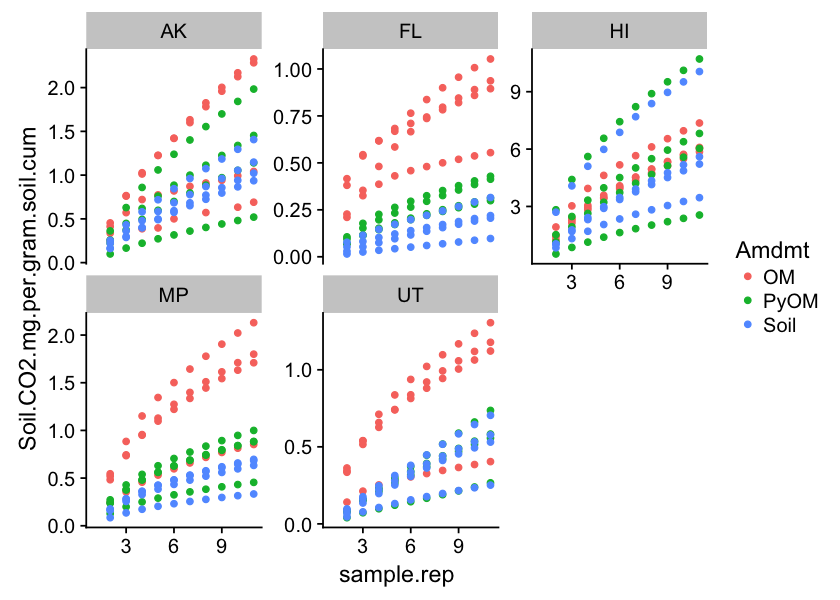

Warning message:
“Removed 60 rows containing missing values (geom_point).”

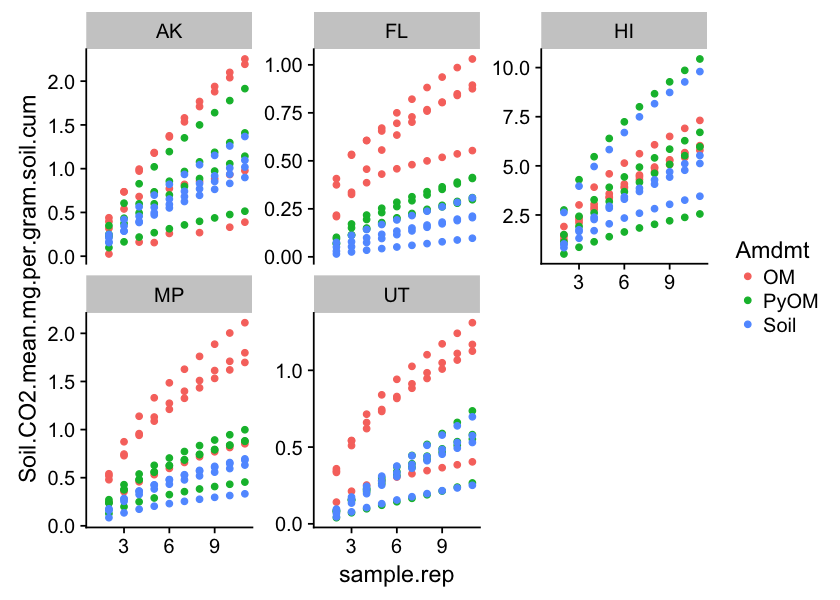

Warning message:
“Removed 260 rows containing missing values (geom_point).”

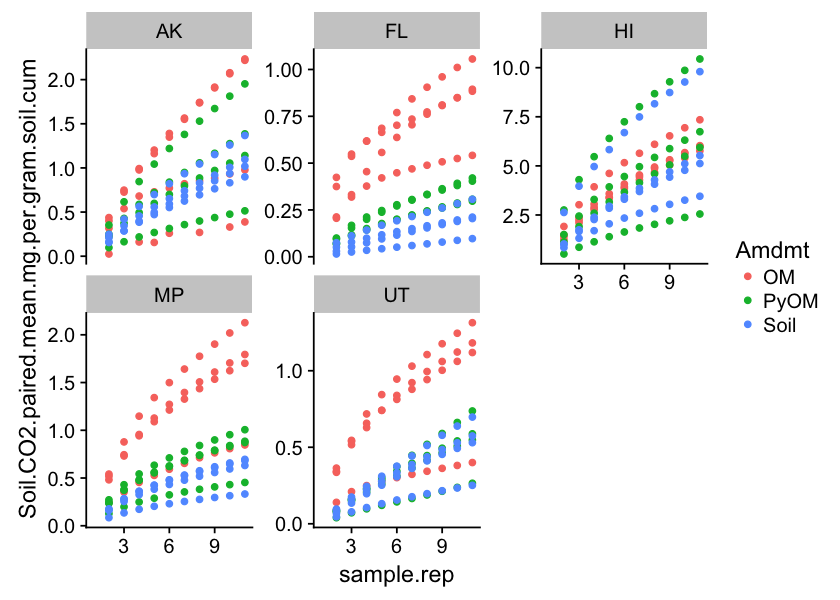

Warning message:
“Removed 260 rows containing missing values (geom_point).”

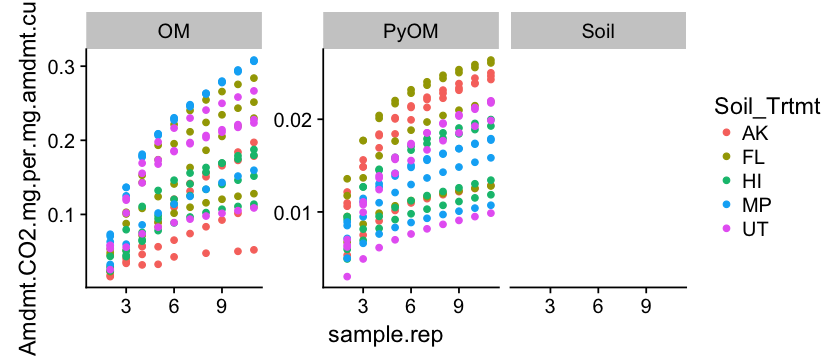

Warning message:
“Removed 260 rows containing missing values (geom_point).”

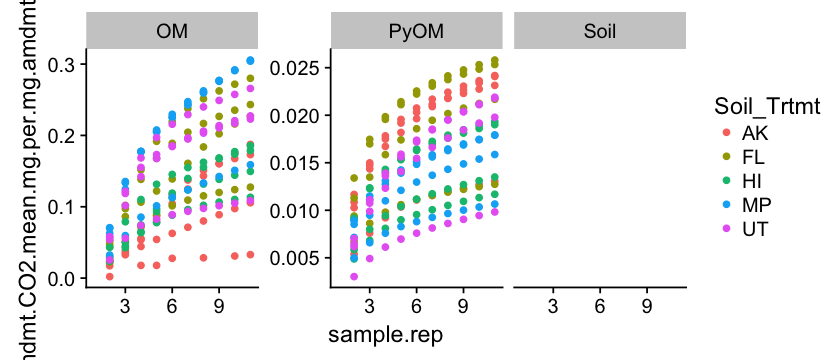

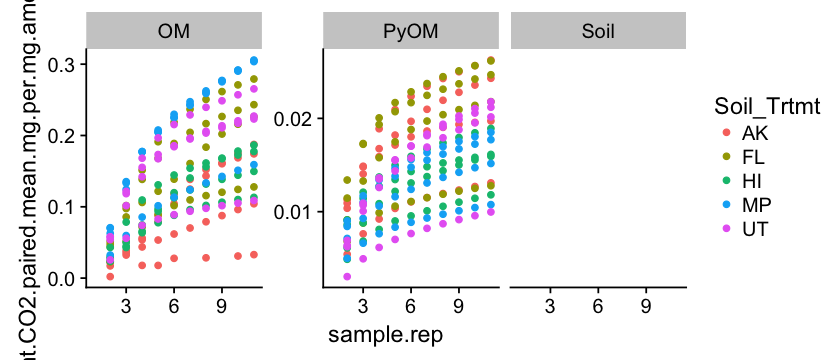

In [31]:
options(repr.plot.width=7, repr.plot.height=5)
# Should be able to plot CO2 at each timestep

df = short.data%>%
    filter(Soil_Sample !="Blank")

p = ggplot(df,aes(x=sample.rep,y=Soil.CO2.mg.per.gram.soil.cum, colour=Amdmt))
p = p + geom_point()
p = p + facet_wrap(~Soil_Trtmt, scales="free_y", ncol=3)
#p = p + ylim(0,1000)
p

p = ggplot(df,aes(x=sample.rep,y=Soil.CO2.mean.mg.per.gram.soil.cum, colour=Amdmt))
p = p + geom_point()
p = p + facet_wrap(~Soil_Trtmt, scales="free_y", ncol=3)
#p = p + ylim(0,1000)
p

p = ggplot(df,aes(x=sample.rep,y=Soil.CO2.paired.mean.mg.per.gram.soil.cum, colour=Amdmt))
p = p + geom_point()
p = p + facet_wrap(~Soil_Trtmt, scales="free_y", ncol=3)
#p = p + ylim(0,1000)
p


options(repr.plot.width=7, repr.plot.height=3)

p = ggplot(df,aes(x=sample.rep,y=Amdmt.CO2.mg.per.mg.amdmt.cum, colour=Soil_Trtmt))
p = p + geom_point()
p = p + facet_wrap(~Amdmt, scales="free_y", ncol=3)
#p = p + ylim(0,1000)
p

p = ggplot(df,aes(x=sample.rep,y=Amdmt.CO2.mean.mg.per.mg.amdmt.cum, colour=Soil_Trtmt))
p = p + geom_point()
p = p + facet_wrap(~Amdmt, scales="free_y", ncol=3)
#p = p + ylim(0,1000)
p

p = ggplot(df,aes(x=sample.rep,y=Amdmt.CO2.paired.mean.mg.per.mg.amdmt.cum, colour=Soil_Trtmt))
p = p + geom_point()
p = p + facet_wrap(~Amdmt, scales="free_y", ncol=3)
#p = p + ylim(0,1000)
p

In [32]:
levels(as.factor(short.data$sample.rep))

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11"

In [33]:
# Save this data
saveRDS(short.data,"../data/Picarro_data/short.data.1-11.rds")